# Module 4: Conservation of Energy

The exercises in this module range from lecture 13 to lecture 24.

In [160]:
!pip install handcalcs -q
!pip install Pillow -q

In [161]:
import handcalcs.render
from sympy import symbols, Eq, solve
from math import sqrt,pi, cos, sin, radians,asin,atan,degrees, tan, log10
from PIL import Image

Global variables:

In [158]:
%%render param
g=9.81 #m/s2
rho_water=1000 #kg/m3
rho_Hg=13600 #kg/m3
p_atm=101325 #Pa

<IPython.core.display.Latex object>

## Problems for Lecture 13: The Bernoulli Equation

---
#### Question 1 (*)

Name each of the terms in the Bernoulli equation (stated below), and describe their interaction in the work-energy interpretation of this equation.  

$$H=\frac{p}{\rho g}+\frac{v^2}{2 g}+z$$

**Solution**

```{toggle}
𝐻 is the total head, or the total available energy within the system.  

$\frac{p}{\rho g}$ is the pressure head, representing buoyancy energy per unit weight.  

$\frac{v^2}{2 g}$ is the velocity head, representing the kinetic energy per unit weight.  

𝑧 is the elevation head, representing the potential energy per unit weight of the fluid.  

Pressure and weight forces do work on a fluid to increase its kinetic energy.

```

---
#### Question 2 (*)[R]

Water flows within a horizontal pipe of diameter 0.1 m at a velocity of 0.2 m/s. The centreline of the pipe is located at the horizontal datum. If the pressure in the pipe is 120 kPa, calculate the pressure and velocity head within the pipe. {12.232 m, 0.002 m}

**Given:**

In [5]:
%%render param 1
D= 0.1 #m 
V= 0.2 #m/s
p= 120 #kPa

<IPython.core.display.Latex object>

**Hint**

```{toggle}

The pressure head can be calculated with the following equation:

$$
\frac{p}{\gamma}
$$

The velocity head can be calculated with the following equation:

$$
\frac{V^2}{2g}
$$

You can assume the density of water is 1000 kg/m<sup>3</sup>
```

**Solution**

In [7]:
%%render long 3
pressure_m = (p*1000)/(rho_water*g) #m 
velocity_m = V**2/(2*g) #m

<IPython.core.display.Latex object>

---
#### Question 3 (**)[R]

For the pipe flow described in question 2, a section of the pipe was elevated by 6 m to avoid an obstruction. Calculate the change in pressure and velocity within the pipe, and justify your answer. 

**Given (pressure and velocity are from Question 2):**

In [9]:
%%render param 
pressure_m=12.232 #m
velocity_m=0.002 #m
z_B=6 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
From the Bernoulli equation we have:

$$
\frac{p_A}{\rho g}+\frac{V_{A}^2}{2g}+z_{A}=\frac{p_B}{\rho g}+\frac{V_{B}^2}{2g}+z_{B}\\
$$  

Considering that $z_A=0$ and solving for $p_B$:  

$$
p_B=(\frac{p_A}{\rho g}+\frac{V_{A}^2}{2g}-\frac{V_{B}^2}{2g}-z_{B})\rho g
$$  

```

**Solution**

```{toggle}
The velocity doesn’t change, as this would require a change in discharge and would violate
the conservation of mass.  

The pressure will reduce due to the increase in elevation
```

In [10]:
%%render long 2 
p_B= (pressure_m-z_B)*rho_water*g #Pa
p_B_= p_B/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 4 (*)[R]

Water discharges from a nozzle as a free jet to the atmosphere. 

a. If the velocity of the jet is 3 m/s, calculate the velocity head within the jet. {0.46 m}

b.Explain why the pressure head within the jet can be neglected

a)

**Given:**

In [12]:
%%render param 
V= 3#m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}

The velocity head can be calculated with the following equation:

$$
\frac{V^2}{2g}
$$

```

**Solution**

In [13]:
%%render long 2 
velocity_m= V**2/(2*g) #m

<IPython.core.display.Latex object>

b)

**Solution**

```{toggle}
Pressure is atmospheric within a free jet.
```

---
#### Question 5 (*)

A pipe containing oil (density = 960 kg/m<sup>3</sup>) has a diameter of 0.1 m.    

a. If the discharge within the pipe is 0.06 m<sup>3</sup> /s, calculate the velocity head within the pipe. {2.97 m}    

b. If the pressure head is 12 m, calculate the pressure within the pipe. {11.3 kPa}

a)

**Given:**

In [11]:
%%render param 1
D= 0.1 #m 
rho= 96 #kg/m3 
Q= 0.06 #m3/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Consider the following equations:

$$
V=\frac{Q}{A}\\
velocity_{head}=\frac{V^2}{2g}
$$  

```

**Solution**

In [12]:
%%render long 2
V= Q/(pi*D**2/4) #m3/s
velocity_head= V**2/(2*g) #m

<IPython.core.display.Latex object>

b)

**Given:**

In [14]:
%%render param 
pressure_head=12 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The pressure can be solved from the following equation of the pressure head:

$$\frac{p}{\rho g}$$

```

**Solution**

In [15]:
%%render long 2
p= pressure_head*rho*g #Pa
p_= p/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 6 (**)

A tank has a circular base (diameter = 1.5 m) and is filled with water to a height of 0.8 m. A small drain pipe with a diameter of 20 mm is opened at the base of the  tank, which discharges water as a free jet to the atmosphere.

a. Determine the discharge of water out of the tank. {0.0012 $m^3/s$}

b. Some time later, the height of water in the tank is 0.3 m. Determine the new discharge of water out of the tank at this time. {0.0008 $m^3/s$}

c. Both of the above calculations assume that the flow is steady out of the tank, i.e. that the rate at which the water height in the tank changes is very slow compared to the velocity out of the tank. Based on your answer to (a), comment on whether this assumption is reasonable

**Given:**

In [17]:
%%render param 1
D_tank= 1.5 #m 
h= 0.8 #m 
D_small= 20 #mm

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The Bernoulli equation can be used between the water in the surface and the free jet. 

$$
\frac{p_{atm}}{\gamma}+\frac{V_{1}^2}{2g}+z_{1}=\frac{p_{jet}}{\gamma}+\frac{V_{2}^2}{2g}+z_{2}
$$

Considering the jet is free to the atmosphere, the variables in point 2 will be:

$$
p_{jet}= 0 Pa \\
z_2= 0 m 
$$

Considering that point 1 is in contact with the atmosphere, we have the following:

$p_{atm}$=0  Pa

$V_1$= is near 0 m/s because the tank is large


Using this values you have the following equation:

$$
z_{1}=\frac{V_{2}^2}{2g}
$$

This equation is the Torricelli's law:

$$
V= \sqrt {2gh}
$$

And the discharge of the tank is 

$$
Q= V*A
$$
```

**Solution**

In [18]:
%%render long 4
V= sqrt(h*2*g) #m/s
Q_a= V*pi*(D_small/1000)**2/(4) #m3/s

<IPython.core.display.Latex object>

b)

**Given:**

In [19]:
%%render param 1
h_b= 0.3 #m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The Torricelli equation can be used:

$$
V= \sqrt {2gh}
$$

And the discharge of the tank is 

$$
Q= V*A
$$
```

**Solution**

In [20]:
%%render long 4
V= sqrt(h_b*2*g) #m/s
Q_b= V*pi*(D_small/1000)**2/(4) #m3/s

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}

To assess whether the steady-flow assumption is reasonable, we need to consider whether the water level in the tank decreases slowly relative to the velocity of the outflow. For that reason, the velocity of the tank should be calculated. 

$$
Q= V_1*A_1\\
A_1= \frac{\pi D^2}{4}
$$

If the rate of change in water height is low, this confirms that the steady-flow assumption is valid
```

**Solution**

In [30]:
%%render long 2
V_1= Q_a*4/(pi*D_tank**2)*1000 #mm/s

<IPython.core.display.Latex object>

```{toggle}
The initial change in water level of the tank is 0.7 mm/s, so this is reasonable.
```

---
#### Question 7 (*)[R]

Water flows from a pipe of 1m diameter through a nozzle of 0.2m diameter before exiting as a free jet.  

a. If the velocity in the free jet is 3 m/s, calculate the discharge and velocity in the pipe. {0.094 $m^3/s$, 0.120 m/s}  

b. Calculate the pressure within the pipe. {4.49 kPa}  

c. State any assumptions made in the above calculations.


a)

**Given:**

In [23]:
%%render param 
D_pipe= 1 #m
D_nozzle= 0.2 #m
V_nozzle= 3 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The discharge can be calculated using:

$$Q=V_{nozzle} A_{nozzle}$$


And the velicity of the pipe is equal to:

$$V_{pipe}= Q/A_{pipe}$$


```

**Solution**

In [24]:
%%render long 3
A_nozzle= pi*D_nozzle**2/4 #m2
Q= V_nozzle*A_nozzle #m3/s
A_pipe= pi*D_pipe**2/4 #m2
V_pipe=Q/A_pipe #m/s


<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
We can use Bernoulli equation to calculate the pressure within the pipe:

$$
\frac{p_{pipe}}{\gamma}+\frac{V_{pipe}^2}{2g}+z_{pipe}=\frac{p_{nozzle}}{\gamma}+\frac{V_{nozzle}^2}{2g}+z_{nozzle}
$$

The assumptions are the following:  

$z_{pipe}=z_{nozzle}$ (horizontal pipe)

$p_{nozzle}=0 Pa$ (it is exposed to atmospheric pressure)

```

**Solution**

In [26]:
%%render long 2
p_pipe= (V_nozzle**2/(2*g)-V_pipe**2/(2*g))*rho_water*g #Pa
p_pipe_= p_pipe/1000 #kPa

<IPython.core.display.Latex object>

c)

**Solution**

```{toggle}
Horizontal pipe, steady flow, incompressible water (and density of 1000 kg/m<sup>3</sup>), no energy losses through nozzle, jet diameter equal to nozzle diameter, uniform flow in both crosssections.

```

---
#### Question 8(*)[R]

Water flows from a large reservoir through a 100 mm pipe before exiting the pipe as a free jet at a location 5 m below the water surface of the reservoir. Calculate the discharge within the pipe. {0.08 $m^3/s$}

**Given:**

In [31]:
%%render param 
D= 100 #mm
z= 5#m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}

We can use Bernoulli equation to calculate the discharge within the pipe:

$$
\frac{p_{atm}}{\gamma}+\frac{V_{1}^2}{2g}+z_{1}=\frac{p_{pipe}}{\gamma}+\frac{V_{2}^2}{2g}+z_{2}
$$

The assumptions are the following 

$p_{atm}$= 0 Pa
$V_1$= is near 0 m/s because the reservoir is large 
$p_{pipe}$= 0 Pa because it is exposed to atmospheric pressure


Considering this assumptions, the Toricelli equation can be used 

$$
V= \sqrt {2gh}
$$
```

**Solution**

In [33]:
%%render long 2
V= sqrt(z*2*g) #m/s
Q_b= V*pi*(D/1000)**2/(4) #m3/s

<IPython.core.display.Latex object>

---
#### Question 9 (**)[R]

Oil (density = 940 kg/m<sup>3</sup>) flow through a pipe of diameter 120 mm. At some location in the pipe, the diameter is reduced to 90 mm.  

a. If the pressure and velocity in the wider (120 mm) section of the pipe are 280 kPa and 5 m/s respectively, calculate the discharge in the pipe. {0.57 $m^3/s$}  

b. Calculate the velocity and pressure in the constricted section. {8.89 m/s, 254.61 kPa}

a)

**Given:**

In [27]:
%%render param 2
rho= 940 #kg/m3
D_1= 120/1000 #m
D_2= 90/1000 #m
p_1= 280*1000 #Pa
V_1= 5 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The discharge in the pipe can be calculated as:

$$Q=V_1A_1$$
```

**Solution**

In [28]:
%%render long 3
A_1= pi*D_1**2/4 #m2
Q= V_1*A_1 #m3/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The velocity can be calculated as:

$$V_2=Q/A_2$$

To calculate the pressure we can use the Bernoulli equation:

$$
\frac{p_{1}}{\gamma}+\frac{V_{1}^2}{2g}+z_{1}=\frac{p_{2}}{\gamma}+\frac{V_{2}^2}{2g}+z_{2}
$$

Where the assumptions are:  

$z_{1}=z_{2}$ (horizontal pipe)

```

**Solution**

In [31]:
%%render long 2

A_2= pi*D_2**2/4 #m2
V_2= Q/A_2 #m/s
p_2= (p_1/(rho*g)+V_1**2/(2*g)-V_2**2/(2*g))*rho*g #Pa
p_2_= p_2/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 10(***)

Water flows in an open channel with a constant width of 1.5 m. At some point in the channel A, the depth is 0.5 m and the velocity is 2.5 m/s. The channel then steps down 1.0 m in a smooth transition to point B. Show that the water depth at B, 𝑑𝐵,
can be expressed as: $d_B= \frac{V_Ad_A}{\sqrt{V_A^2+2g(d_A+1-d_B)}}$ where 𝑣𝐴 is the velocity at point A, 𝑔 is the gravitational acceleration, and 𝑑𝐴 is the water depth at point A. 

**Hint**

```{toggle}

We can use Bernoulli equation to show that the water depth can be expressed as the equation showed in the question.

$$
\frac{p_{A}}{\gamma}+\frac{V_{A}^2}{2g}+z_{A}=\frac{p_{B}}{\gamma}+\frac{V_{B}^2}{2g}+z_{B}
$$

The assumptions are the following 

$$
z_B= 0 m
$$

The pressure in point 1 and 2 can be expressed with the following equation 

$$
p_A= \rho gd_A\\
p_B=\rho gd_B\\
$$


**Solution**

```{toggle}

We can use Bernoulli equation to show that the water depth can be expressed as the equation showed in the question.

$$
\frac{p_{A}}{\gamma}+\frac{V_{A}^2}{2g}+z_{A}=\frac{p_{B}}{\gamma}+\frac{V_{B}^2}{2g}+z_{B}
$$

The assumptions are the following 

$$
z_B= 0 m
$$

The pressure in point 1 and 2 can be expressed with the following equation 

$$
p_A= \rho gd_A\\
p_B=\rho gd_B\\
$$

$$
d_A +\frac{V_{A}^2}{2g}+z_A= d_B+\frac{V_{B}^2}{2g}\\
$$
$$
z_A= 1 m
$$

Then we can used the the conservation of mass to calculate the velocity in section B. 

$$
Q_A=Q_B\\
$$

$$
V_A*d_A*b= V_B*d_B*b\\
$$
$$
V_B=\frac{V_A*d_A}{d_B}\\
$$

$$
d_A +\frac{V_{A}^2}{2g}+z_A= d_B+\frac{V_A^2*d_A^2}{d_B^22g}
$$

Organizing the equation we have that 

$$
2g(d_A+1)+V_A^2= \frac {V_A^2d_A^2}{d_B^2}+db*2g\\
2g(d_A+1-d_B)+V_A^2= \frac {V_A^2d_A^2}{d_B^2}\\
d_B^2=V_A^2d_A^2\frac{1}{V_A^2+2g(d_A+1-d_B)}
$$
```

## Problems for Lecture 14: Energy Grade Line and Hydraulic Grade Line

---
#### Question 1 (*)[R]

Water flows within a horizontal pipe of diameter 0.1 m at a velocity of 0.25 m/s. The centreline of the pipe is located 2.5 m above the horizontal datum. If the pressure in the pipe is 120 kPa, calculate the height of the EGL and HGL relative to datum. {14.74 m, 14.73 m} 

**Given:**

In [32]:
%%render param 2
D= 0.1 #m 
V= 0.25 #m/s
z= 2.5 #m
p=120*1000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The energy grade line can be calculated as:

$$EGL=\frac{p}{\gamma}+\frac{V^2}{2g}+z$$


The hydraulic grade line can be calculated as:

$$HGL=\frac{p}{\gamma}+z$$
```

**Solution**

In [33]:
%%render long 2
EGL= p/(rho_water*g)+V**2/(2*g)+z #m
HGL= p/(rho_water*g)+z #m

<IPython.core.display.Latex object>

---
#### Question 2 (*)

Water flows from a large reservoir through a 200 mm pipe before exiting the pipe as a free jet at a location 4.5 m below the water surface of the reservoir.

a. Calculate the discharge within the pipe. {0.295 $m^3/s$}

b. Draw the HGL and EGL for this problem.

**Given:**

In [34]:
%%render param 1
D= 200 #mm 
h= 4.5 #m 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The discharge flow within the pipe can the calculated as:

$$
Q=V*A
$$

And the velocity can be calculated with the Toricelli Law 

$$
V= \sqrt {2gh}
$$
```

**Solution**

In [36]:
%%render long 3
V= sqrt(h*2*g) #m/s
Q= V*pi*(D/1000)**2/(4) #m3/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}

The EGL (Energy Grade Line) is the total energy at each point along the flow. This includes the kinetic energy and the potential energy. Considering there is no friction loss in this exercise, the EGL should be a straight line, strarting from the water surface to the jet exit. 

$$
EGL= \frac{p}{\gamma}+\frac{V^2}{2g} +z
$$

The HGL (Hydraulic Grade Line) represents the sum of the pressure head and the elevation head. At the reservoir, the HGL will be at the same level of the water surface, but as the water moves down the jet, the HGl will drop. This occured because the pressure head in the free jet is essentially zero as the presurre is atmospheric. 

$$
HGL= \frac{p}{\gamma}+z
$$

```

**Solution**

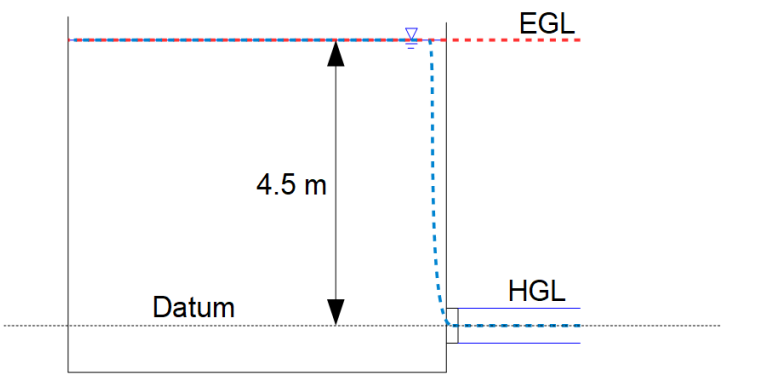

In [38]:
from PIL import Image
img = Image.open(r"figures/14.2.png")
img

---
#### Question 3 (**)[R]

In the situation illustrated in the figure, the water height h is 200 mm.  

a. Calculate the discharge through the pipe.{0.0156 $m^3/s$}  

b. Calculate the pressure in the narrow section. {−29.4 kPa (gauge pressure)}  

c. Draw the EGL and HGL for this problem.

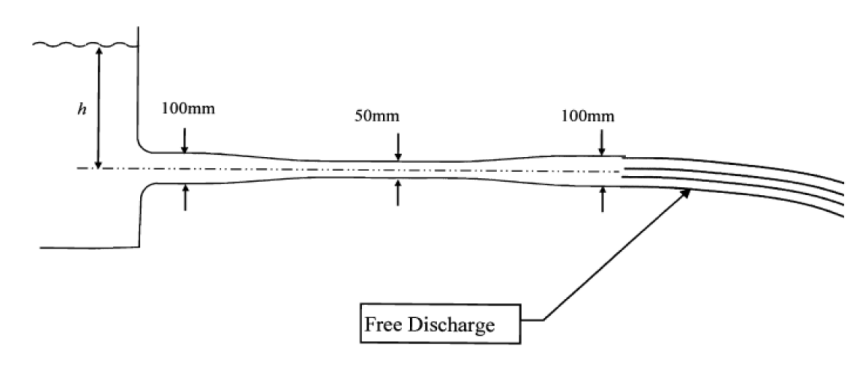

In [63]:
from PIL import Image
img = Image.open(r"figures/14.3.png")
img

**Given:**

In [37]:
%%render param 2
h= 200/1000 #m
D_1= 100/1000 #m
D_2= 50/1000 #m
D_3= 100/1000 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
From the Bernoulli equation we have:

$$V_3= \sqrt{2gh}$$

And the discharge can be calculated as:  

$$Q=V_3A_3$$
```

**Solution**

In [38]:
%%render long 4 
V_3= sqrt(2*g*h) #m/s
A_3= pi*D_3**2/4 #m2
Q= V_3*A_3 #m3/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
From the Bernoulli equation we have:

$$
\frac{p_{1}}{\gamma}+\frac{V_{1}^2}{2g}+z_{1}=\frac{p_{2}}{\gamma}+\frac{V_{2}^2}{2g}+z_{2}
$$

The assumptions are the following 

$p_1=0 Pa$  (atmosferic presure)  

$V_1= 0 m/s$ (because it is a reservoir)

```

**Solution**

In [42]:
%%render long 2
V_2= Q/(pi*D_2**2/4) #m/s
z_1=h #m
p_2= (z_1-V_2**2/(2*g))*rho_water*g #Pa
p_2_= p_2/1000 #kPa

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}

The EGL (Energy Grade Line) is the total energy at each point along the flow. This includes the kinetic energy and the potential energy. Considering there is no friction loss in this exercise, the EGL should be a straight line at the level of the water surface.

$$
EGL= \frac{p}{\gamma}+\frac{V^2}{2g} +z
$$

The HGL (Hydraulic Grade Line) represents the sum of the pressure head and the elevation head. At the reservoir, the HGL will be at the same level of the water surface. As the water flows down the pipe, the HGL will drop due to the increasing velocity, but when the diameter is reduced, the HGL decreases due to the increment in velocity. At the pipe exit, the pressure head becomes zero, so the HGL will end at the same level as the exit of the pipeline.

$$
HGL= \frac{p}{\gamma}+z
$$

```

**Solution**

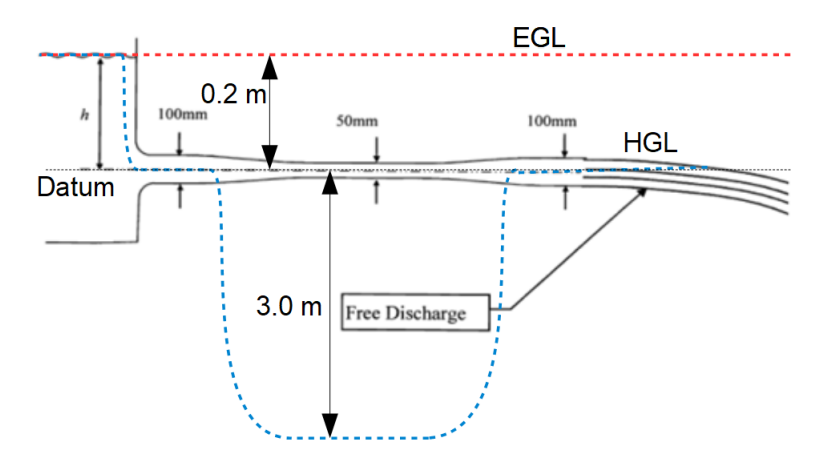

In [75]:
from PIL import Image
img = Image.open(r"figures/14.3S.png")
img

---
#### Question 4 (**)[R]

Water flows out of a large tank and through the pipeline as shown in Figure 2.

a. Construct the energy grade line and hydraulic grade line for the pipe, labelling the relevant quantities on your diagram.

b. Using your solution to part (a), calculate the pressure and velocity within the 200mm diameter section of the pipe. {43.53 kPa, 3.32 m/s}

c. State any assumptions you have made within your answers to (a) and (b)

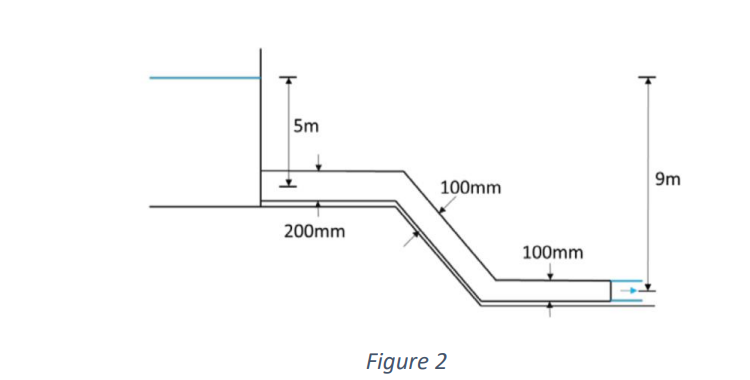

In [39]:
from PIL import Image
img = Image.open(r"figures/14.4.png")
img

**Given:**

In [44]:
%%render param 
z_1= 5 #m 
D_1= 200 #mm 
D_2= 100 #mm
D_3= 100#mm 
z_t= 9 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}

The EGL (Energy Grade Line) is the total energy at each point along the flow. This includes the kinetic energy and the potential energy. Considering there is no friction loss in this exercise, the EGL should be a straight line, strarting from the water surface to the exit of the pipeline. 

$$
EGL= \frac{p}{\gamma}+\frac{V^2}{2g} +z
$$

The HGL (Hydraulic Grade Line) represents the sum of the pressure head and the elevation head. At the reservoir, the HGL will be at the same level of the water surface, but as the water flows down the pipe, the HGL will drp at each point due to the increasing velocity. At the pipe exit, the pressure head becomes zero, so the HGL will end at the same level as the exit of the pipeline

$$
HGL= \frac{p}{\gamma}+z
$$

```

**Solution**

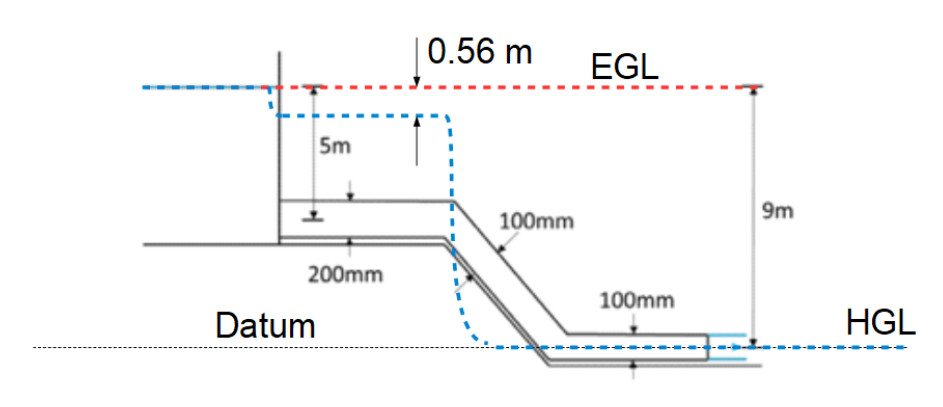

In [40]:
from PIL import Image
img = Image.open(r"figures/14.4S.png")
img

b)

**Hint**

```{toggle}

The velocity can be calculated with the Toricelli equation in the pipe exit. 

$$
V_3=\sqrt (2gh)
$$

Once the velocity at the exit is calculated, the discharge can be determined with:

$$
Q_3=V_3*A_3
$$

Once the discharge is calculated, the velocity in the 200 mm diameter pipe can be determined by using the conservation of mass 

$$
Q_1=Q_2=Q_3\\
Q_3=V_2*A_2\\
V_2=\frac{Q_3}{A_2}\\
V_2=\frac{Q_34}{\pi D^2}
$$

Once the velocity in this pipe is calculated, the Bernoulli equation can be determine between the surface of the tank and that pipe 

$$
\frac{p_{atm}}{\gamma}+\frac{V_1^2}{2g} +z_1=\frac{p_2}{\gamma}+\frac{V_2^2}{2g} +z_2
$$

The following assumptions can be made 

$$
p_{atm}=0 Pa\\
z_2= 0 m\\
V_1= 0 m/s
$$

Using this, the Bernoulli equation for this exercise is:


$$
z_1=\frac{p_2}{\gamma}+\frac{V_2^2}{2g}
$$


```

**Solution**

In [45]:
%%render long 2 
V_3= sqrt (2*g*z_t) #m/s
Q_3= V_3*pi*(D_3/1000)**2/4 #m3/s

V_2= Q_3*4/(pi*(D_1/1000)**2) #m/s

p_2= ((z_1-V_2**2/(2*g))*rho_water*g)/1000 #kPa

<IPython.core.display.Latex object>

c)

**Solution**

```{toggle}
Incompressible fluid, no losses in pipe, diameter of free discharge is equal to pipe diameter.
```

---
#### Question 5 (**)[R]

An object is placed in an open channel such that a stagnation point (zero velocity) is created on the leading edge of the object. You may assume that the density of water is equal to 1000 kg/m<sup>3</sup> for this problem.  

a. If the water in the channel is flowing at a velocity of 2 m/s, calculate the dynamic pressure at the stagnation point. {2 kPa}  

b. If the object is replaced by a pitot tube, which also creates a stagnation point within the same flow, calculate the height to which water would rise in the pitot tube. {h=0.204 m}  

c. A short time later, the velocity in the open channel has changed. The water level in the pitot tube is now 150 mm. Calculate the new velocity in the channel. {1.72 m/s}  

d. Explain which line is represented by the water level in the pitot tube, and which line is represented by the water level in the channel itself.

**Given:**

In [59]:
%%render param 
V_1=0 #m/s
V_2= 2 #m/s

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
From Bernoulli equation we have:

$$
\frac{p_{1}}{\gamma}+\frac{V_1^2}{2g} +z_1=\frac{p_2}{\gamma}+\frac{V_2^2}{2g} +z_2
$$

Assuming the following we can solve the pressure at the stagnation point:  

$p_1=0 Pa$ (atmosferic pressure)  
$z_1=z_2=0 m$ (horizontal channel)  
$V_1=0 Pa$ (given in the question)

```

**Solution**

In [60]:
%%render long 1 
p_2= ((V_2**2/(2*g))*rho_water*g)/1000 #kPa

<IPython.core.display.Latex object>

b)


**Hint**

```{toggle}
The height to which water would rise in the pitot tube can be solved from the following equation:  

$$p=\rho gh$$

```

**Solution**

In [61]:
%%render long 3 
h= p_2*1000/(rho_water*g) #m

<IPython.core.display.Latex object>

c)

**Given:**

In [84]:
%%render param 2
h=150/1000 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The velocity can be calculated using the following equation:  

$$V=\sqrt{2gh}$$

```

**Solution**

In [86]:
%%render long 2 
V= sqrt(2*g*h) #m/s

<IPython.core.display.Latex object>

d)

**Solution**

```{toggle}
The water level in the pitot tube represents the EGL, while the water level in the channel represents the HGL.
```

---
#### Question 6 (**)[R]

Water flows through a pipe (diameter of 50 mm). A pitot tube placed in the flow measures a water height of 150 mm relative to the centre of the pipe, and a piezometer at the side of the pipe measures a water height of 90 mm relative to the 
centre of the pipe.

a. Determine the average velocity of the water flowing in the pipe. {1.08 m/s}

b. Calculate the dynamic pressure at the stagnation point of the pitot tube. {589 Pa}

c. Draw the EGL and HGL for this problem.

**Given:**

In [50]:
%%render param 
D= 50 #mm
h_pit=150#mm
h_p=90 #mm 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The piezometer measures the pressure head component of the Bernoulli equation along with the elevation head (𝑧). The Pitot tube measures the pressure head, the velocity head, and the elevation head (z). This means the Pitot tube measures the Energy Grade Line (EGL) while the piezometer measures the Hydraulic Grade Line (HGL).

Considering the equation for HGL:

$$
HGL= \frac{p}{\gamma} + z
$$

And the equation for EGL:

$$
EGL= \frac{p}{\gamma} + \frac{V^2}{2g}+ z
$$

We know that EGL is 0.15 m, and the HGL is 0.09 m. If we use this values with the equation we have 

$$
0.09= \frac{p}{\gamma} + z
$$

And the equation for EGL:

$$
0.15= \frac{p}{\gamma} + \frac{V^2}{2g}+ z
$$

$$
0.15 = 0.09 + \frac{V^2}{2g}
$$
```

**Solution**

In [51]:
%%render long 2 
V= sqrt (2*g*((h_pit/1000)-h_p/1000)) #m/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The dynamic pressure (𝑞) can be calculated using the formula:

$$
\Delta p= \frac{\rho V^2}{2}
$$
```

**Solution**

In [52]:
%%render long 0
Delta_p= rho_water*V**2/2 #Pa

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The piezometer measures the pressure head component of the Bernoulli equation along with the elevation head (𝑧). The Pitot tube measures the pressure head, the velocity head, and the elevation head (z). This means the Pitot tube measures the Energy Grade Line (EGL) while the piezometer measures the Hydraulic Grade Line (HGL).

Considering the equation for HGL:

$$
HGL= \frac{p}{\gamma} + z
$$

And the equation for EGL:

$$
EGL= \frac{p}{\gamma} + \frac{V^2}{2g}+ z
$$
We know that the Energy Grade Line (EGL) is 0.15 m and the Hydraulic Grade Line (HGL) is 0.09 m. Assuming there are no friction losses, both lines will be horizontal.
```

**Solution**

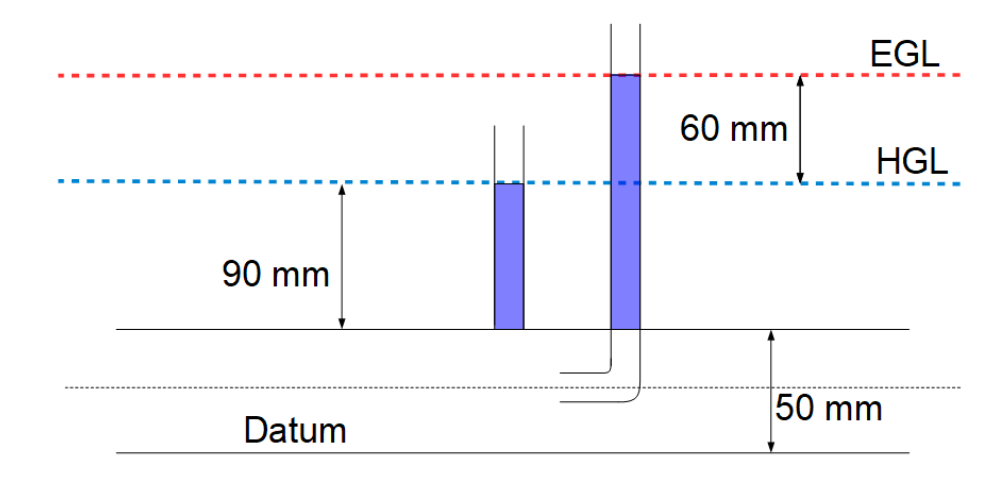

In [51]:
from PIL import Image
img = Image.open(r"figures/14.6.png")
img

---
#### Question 7 (**)

Water flows through the pipe shown in the figure with a velocity of 3 m/s (in the 200 mm section of the pipe).  

a. If the pressure in the 200 mm section of the pipe is 350 kPa, calculate the pressures in the other two sections of pipe. {319.78 kPa, 178.72 kPa}  

b. Draw the EGL and HGL for this problem.

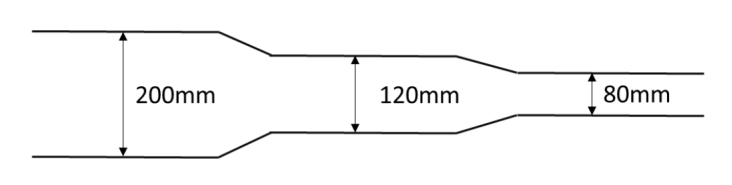

In [87]:
from PIL import Image
img = Image.open(r"figures/14.7.png")
img

**Given:**

In [54]:
%%render param 2
V_1= 3 #m/s
D_1= 200/1000 #m
D_2= 120/1000 #m
D_3= 80/1000 #m
p_1=350*1000 #Pa

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The pressure in the 120 mm section can be calculated using the Bernoulli equation between the 200 mm and the 120 mm sections:

$$
\frac{p_{1}}{\gamma}+\frac{V_1^2}{2g} +z_1=\frac{p_2}{\gamma}+\frac{V_2^2}{2g} +z_2
$$


The pressure in the 80 mm section can be calculated using the Bernoulli equation between the 120 mm and the 80 mm sections:

$$
\frac{p_{2}}{\gamma}+\frac{V_2^2}{2g} +z_2=\frac{p_3}{\gamma}+\frac{V_3^2}{2g} +z_3
$$


As the pipe is horizontal, $z_1=z_2$, and $V_2$ and $V_2$ can be calculated considering conservation of mass:  

$$V= \frac{Q}{A}$$  
```

**Solution**

In [56]:
%%render long 2
Q= V_1*(pi*D_1**2/4) #m3/s
V_2= Q/(pi*D_2**2/4) #m/s
p_2= (p_1/(rho_water*g)+V_1**2/(2*g)-V_2**2/(2*g))*rho_water*g #Pa
p_2_= p_2/1000 #kPa
V_3= Q/(pi*D_3**2/4) #m/s
p_3= (p_2/(rho_water*g)+V_2**2/(2*g)-V_3**2/(2*g))*rho_water*g #Pa
p_3_= p_3/1000 #kPa

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}

The EGL (Energy Grade Line) is the total energy at each point along the flow. This includes the kinetic energy and the potential energy. Considering there is no friction loss in this exercise, the EGL should be a straight line.

$$
EGL= \frac{p}{\gamma}+\frac{V^2}{2g} +z
$$

The HGL (Hydraulic Grade Line) represents the sum of the pressure head and the elevation head.This line will drop with each reduction in diameter due to the increase in velocity.

$$
HGL= \frac{p}{\gamma}+z
$$

```

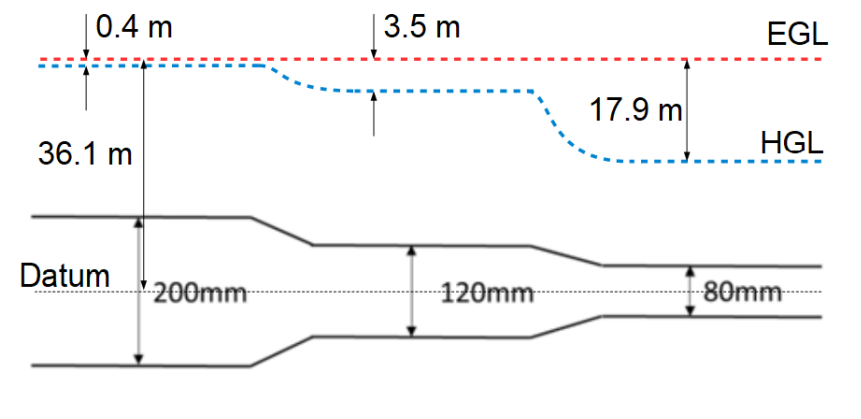

In [96]:
from PIL import Image
img = Image.open(r"figures/14.7S.png")
img

## Problems for Lecture 15: Flow Measurement

---
#### Question 1 (*)

Using the measurements from a Venturi Meter, you have calculated that the discharge through a pipe system should be 24 litres per second. To check this theoretical discharge, you have captured a volume of 4.0 m<sup>3</sup> from the pipe system. It  took 3 minutes to collect this volume. Calculate the discharge coefficient. {0.93}

**Given:**

In [6]:
%%render param 
Q_t= 24 #L/s
V= 4 #m3
t= 3#min


<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the discharge coefficient (𝐶𝑑), we need to compare the actual discharge with the theoretical discharge obtained from the Venturi meter.

$$
C_d= \frac{Q_a}{Q_t}
$$

The actual discharge flow can be calcualted as 

$$
Q= \frac{Vol}{t}
$$

To calculate the $C_d$ the theorethical and actual discharge have to be in the same units. We are going to use $m^3/s$


For that reason, the following change of units needs to be done

$V= m^3$ to L

and 

$t$=min to seg
```

**Solution**

In [7]:
%%render long 2
Q_a= (V*1000)/(t*60) #L/s
C_d= Q_a/Q_t

<IPython.core.display.Latex object>

---
#### Question 2 (*)

Using the measurements from an Orifice Meter, you have calculated that the discharge through a pipe system should be 3.0 litres per second. You use a calibration tank with a surface area of 0.4 m<sup>2</sup> to check this discharge. If the water level in the calibration tank rises at a rate of 4 mm/s, calculate the discharge coefficient. {0.53} 

**Given:**

In [98]:
%%render param 
Q_t= 3/1000 #m3/s
A= 0.4 #m2
V= 4/1000 #m/s


<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the discharge coefficient (𝐶𝑑), we need to compare the actual discharge with the theoretical discharge obtained from the Venturi meter.

$$
C_d= \frac{Q_a}{Q_t}
$$

The actual discharge flow can be calcualted as 

$$
Q_a= AV
$$

```

**Solution**

In [99]:
%%render long 3
Q_a= A*V #m3/s
C_d= Q_a/Q_t

<IPython.core.display.Latex object>

---
#### Question 3 (*)

Using the measurements from a Venturi Meter, you have calculated that the discharge through a pipe system should be 13 litres per second. Downstream of the Venturi Meter, you have installed a piezometer and a pitot tube. If the difference in water levels between the piezometer and the pitot tube is 70 mm, and the pipe diameter is 0.1 m, calculate the discharge coefficient. {0.71}

**Given:**

In [8]:
%%render param 1
Q_t= 13 #L/s
h= 70 #mm
D= 0.1#m


<IPython.core.display.Latex object>

**Hint**

```{toggle}
Calculate the Velocity from the Pitot Tube Measurement:

$$
V= \sqrt {2g\Delta h}
$$

An then the actual discharge can be calculated:

$$
Q_a= VA
$$

Additionally, the following change of units must be performed:

$$
h= mm \: to \:  m \\
Q_a= L/s \:  to \:  m^3/s
$$
```

**Solution**

In [11]:
%%render long 3
V= sqrt(2*g*(h/1000)) #m/s
Q_a= (V)*pi*D**2/4 #m3/s
Q_a_m= Q_a*1000 #L/s
C_d= Q_a_m/Q_t

<IPython.core.display.Latex object>

---
#### Question 4 (**)[R]

Water flows in an open channel of 2.0 m width. At some point in the channel, the water flows over a smooth submerged object that is 1.0 m high. If the water depth upstream of the object is 2.5 m and the depth downstream of the object is 0.5 m, calculate the discharge in the channel. {6.4 $m^3/s$}

**Given:**

In [29]:
%%render param 1
B= 2 #m
z= 1#m
y_1= 2.5#m
y_2= 0.5 #m


<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the discharge we can use the following equation:

$$Q=VA$$

The velocity can be solved using a system of equations based on the conservation of mass and energy:  

Equation 1:  


$$Q_1=Q_2$$
$$V_1A_1=V_2A_2$$
$$V_1by_1=V_2by_2$$

Equation 2:  

$$E_1=E_2$$
$$y_1+ \frac{V_1^2}{2g}=y_2+ \frac{V_2^2}{2g}$$
```

**Solution**

In [11]:

from sympy.solvers import solve
from sympy import Symbol
V_1 = Symbol("V_1")
expr= y_1+V_1**2/(2*g)-y_2-(((y_1/y_2)*V_1)**2)/(2*g)
V_1 = solve((expr), (V_1))
V_1=round(V_1[1],3) #m/s

print('Solving the system equation we have V_1=', V_1, "m/s")

Solving the system equation we have V_1= 1.279 m/s


In [30]:
%%render long 1
Q= V_1*B*y_1 #m3/s


<IPython.core.display.Latex object>

---
#### Question 5 (**)

Water flows in an open channel of 1.2 m width. At some point in the channel, the water flows over a smooth submerged object. If the water depth upstream of the object is 1.2 m and the depth downstream of the object is 0.4 m, and the actual discharge in the channel is 1.6 m<sup>3</sup>/s, calculate the discharge coefficient. {0.79}

**Given:**

In [14]:
%%render param 1
B= 1.2 #m
y_1= 1.2#m
y_2= 0.4 #m
Q_a= 1.6 #m3/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The flow can be calculated with the following equation:

$$
Q= B \sqrt {2g(y_1-y_2)}\frac{y_1y_2}{\sqrt{y_1^2-y_2^2}}
$$
```

**Solution**

In [16]:
%%render long 2
Q_t= B*sqrt(2*g*(y_1-y_2))*((y_1*y_2)/(sqrt(y_1**2-y_2**2)))#m3/s
C_d=Q_a/Q_t

<IPython.core.display.Latex object>

---
#### Question 6 (*)[R]

A Venturi Meter has a pipe diameter of 120 mm and a throat diameter of 50 mm. When water is flowing through the Venturi Meter, the pressure in the pipe and the throat is recorded using piezometers. If the difference in water height in the two piezometers is 50 mm, calculate the discharge in the Venturi Meter. {1.975 L/s}

**Given:**

In [11]:
%%render param 2
D_1= 120/1000 #m
D_2= 50/1000 #m
h_p=50/1000 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The flow can be calculated with the following equation:

$$
Q= \sqrt{{2g\Delta h}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$

```

**Solution**

In [10]:
%%render long 3
A_1= pi*(D_1)**2/4 #m2
A_2= pi*(D_2)**2/4#m2

Q= (sqrt(2*g*h_p)*((A_1*A_2)/(sqrt(A_1**2-A_2**2))))*1000 #L/s

<IPython.core.display.Latex object>

---
#### Question 7 (**)[R]

A Venturi Meter has a pipe diameter of 120 mm and a throat diameter of 50 mm (i.e. the same as in Question 6). Now, however, the piezometers are replaced with a differential manometer filled with mercury (S.G. = 13.5). If the differential manometer registers a height difference of 20 mm, calculate the discharge passing 
through the Venturi Meter. {4.4 L/s} 

**Given:**

In [17]:
%%render param 1
D_1= 120 #mm
D_2= 50 #mm 
SG= 13.5 
Delta_h= 20 #mm 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The flow can be calculated with the following equation:

$$
Q= \sqrt{{2g\Delta h}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$

The difference between this and the last exercise is that the last one is with piezometers and this one with differential manometer. For that reason, you can not use $\Delta h= 20 mm$ because that is the height of the mercury. The first step is to change $\Delta h$ to $\Delta p$ with the following equation:

$$
\Delta p= (\rho_{Hg}-rho_{water})\Delta h g
$$


After having the $\Delta p$ you can replace it in the discharge equation as:

$$
Q= \sqrt{\frac{2\Delta p}{\rho_{water}}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$
```

**Solution**

In [18]:
%%render long 3
A_1= pi*(D_1/1000)**2/4 #m2
A_2= pi*(D_2/1000)**2/4#m2
rho_Hg= SG*rho_water #kg/m3
Delta_p= (rho_Hg-rho_water)*g*(Delta_h/1000) #Pa
Q= sqrt(2*(Delta_p/rho_water))*((A_1*A_2)/(sqrt(A_1**2-A_2**2))) #m3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

---
#### Question 8 (**)[R]

A Venturi Meter has a pipe diameter of 180 mm and a throat diameter of 60
mm. When water is flowing through the Venturi Meter, the pressure in the pipe and
the throat is recorded using piezometers. If the difference in water height in the two
piezometers is 70 mm, and the discharge coefficient is 0.95, calculate the actual
discharge in the Venturi Meter. {3.17 L/s}

**Given:**

In [19]:
%%render param 2
D_1= 180/1000 #m
D_2= 60/1000 #m 
h= 70/1000 #m
C_d= 0.95

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The theoretical discharge can be calculated with the following equation:

$$
Q_t= \sqrt{{2g\Delta h}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$

The actual discharge can be solved from:

$$C_d= \frac{Q_a}{Q_t}$$
```

**Solution**

In [20]:
%%render long 2
A_1= pi*(D_1)**2/4 #m2
A_2= pi*(D_2)**2/4#m2
Q_t= (sqrt(2*g*h)*((A_1*A_2)/(sqrt(A_1**2-A_2**2))))*1000 #L/s
Q_a= C_d*Q_t #L/s

<IPython.core.display.Latex object>

---
#### Question 9 (**)[R]

An orifice plate (internal diameter of 30 mm) is placed in a pipe with a diameter of 80 mm. With water flowing through the pipe, the pressure difference recorded by two piezometers attached to the orifice plate is 300 mm. 

a. If the coefficient of discharge of the orifice plate is equal to 0.6, calculate the actual discharge flowing through the pipe. {1 L/s}

b. With the aid of a sketch, show the main source of energy loss associated with water flow through an orifice plate. Include an illustration of the location of the two piezometers, and explain why we can use these measurements to determine the discharge. 

**Given:**

In [31]:
%%render param 1
D_o= 30 #mm
D_p= 80 #mm 
Delta_h= 300 #mm 
C_d= 0.6

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The theoretical flow can be calculated with the Equation for flow rate through an orifice:

$$
Q= \sqrt{{2g\Delta h}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$

The actual discharge can be calculated with the coefficient of discharge equation:

$$
Q_a= C_d*Q_t
$$
```

**Solution**

In [22]:
%%render long 4
A_1= pi*(D_p/1000)**2/4 #m2
A_2= pi*(D_o/1000)**2/4#m2
Q_t= sqrt(2*g*Delta_h/1000)*((A_1*A_2)/(sqrt(A_1**2-A_2**2)))#m3/s
Q_a= C_d*Q_t #m3/s
Q_a_= Q_a*1000 #L/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The main source of energy loss when water flows through an orifice plate is due to the sudden contraction and expansion of the flow as it passes through the orifice. This energy loss is associated with flow separation at the edges of the orifice, leading to turbulent eddies and vortex formation.
```

**Solution**

```{toggle}
The main source of the energy loss is the flow separation from the sharp edge of the Orifice Plate. The piezometer locations are shown on the sketch below. Experimental  evidence shows that the pressure in the separation region is the same as the pressure at point 2 (the constriction in the orifice plate itself), which is why we can use these in a similar manner to those in the pipe and throat of a Venturi Meter. 
```

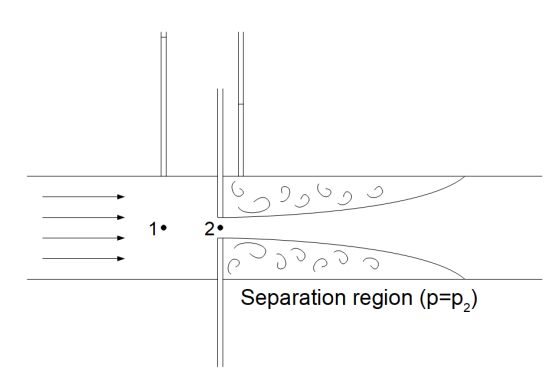

In [24]:
from PIL import Image
img = Image.open(r"figures/15.9S.png")
img

---
#### Question 10 (***)

A Venturi Meter has a pipe diameter of 120 mm and a throat diameter of 50 mm. When water is flowing through the Venturi Meter, the pressure in the pipe and the throat is recorded using piezometers. The difference in water height in the two piezometers is 80 mm. Downstream of the Venturi Meter, water passes through a nozzle and exits as a free jet to the atmosphere.  

a. If the jet velocity is 3 m/s and the jet diameter is 0.02 m, calculate the discharge coefficient. {0.38}  

b. Calculate the pressure within the pipe. {4.48 kPa} 

**Given:**

In [25]:
%%render param 2
D_1= 120/1000 #m
D_2= 50/1000 #m
Delta_h= 80/1000 #m 
V_jet= 3 #m/s
D_jet= 0.02 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The theoretical flow can be calculated with the Equation for flow rate through an orifice:

$$
Q_t= \sqrt{{2g\Delta h}}\frac{A_1A_2}{\sqrt{A_1^2-A_2^2}}
$$

The actual discharge can be calculated AS:

$$
Q_a= V_{jet} A_{jet}
$$  

and the discharge coefficient is:

$$C_d= \frac{Q_a}{Q_t}$$


```

**Solution**

In [26]:
%%render long 4
A_1= pi*(D_1)**2/4 #m2
A_2= pi*(D_2)**2/4#m2
Q_t= sqrt(2*g*Delta_h)*((A_1*A_2)/(sqrt(A_1**2-A_2**2)))#m3/s
A_jet= pi*(D_jet)**2/4#m2
Q_a= V_jet*A_jet #m3/s
C_d= Q_a/Q_t

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
From the Bernoulli equation we have:

$$\frac{p_2}{\rho g}+\frac{V_2^2}{2 g}=\frac{p_3}{\rho g}+\frac{V_3^2}{2 g}$$

Assuming $p_3=0$ because the pressure is atmosferic, and calculating $V_2$ as $V_2=Q_t/A_2$, we can solve $p_2$.

Finally, the pressure in the pipe can be clculated as $p_1=p_2+\Delta p$, where $\Delta p=\rho g \Delta h$

```

**Solution**

```{toggle}
The main source of the energy loss is the flow separation from the sharp edge of the Orifice Plate. The piezometer locations are shown on the sketch below. Experimental  evidence shows that the pressure in the separation region is the same as the pressure at point 2 (the constriction in the orifice plate itself), which is why we can use these in a similar manner to those in the pipe and throat of a Venturi Meter. 
```

In [28]:
%%render long 2
V_2= Q_t/(pi*D_2**2/4) #m/s
p_2= (V_jet**2/(2*g)-V_2**2/(2*g))*rho_water*g #Pa
Delta_p= rho_water*g*Delta_h #Pa
p_1= p_2+Delta_p #Pa
p_1_= p_1/1000 #kPa

<IPython.core.display.Latex object>

## Problems for Lecture 16: Energy Equation

### Energy equation

---
#### Question 1 (*)

Water flows up pipe AB (5 m long, 40 mm diameter) and along BC (3 m long, 30 mm diameter) at 1.75 L/s. If the measured pressure at A is 250 kPa, and the pipe friction loss between A and C is 1.45 m, find the pressure at C. Neglect local energy losses caused by the diameter change and bend at B. {184.63 kPa}


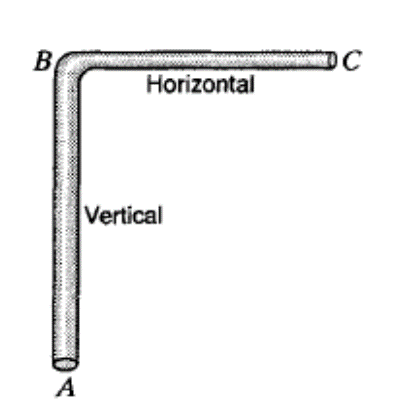

In [14]:
from PIL import Image
img = Image.open(r"figures/85.png")
img

**Given:**

In [32]:
%%render param 2
D_AB= 40 #mm 
L_AB= 5#m 
D_BC= 30 #mm 
L_BC= 3#m 
Q=1.75 #L/s
p_A= 250 #kPa
h_f_AC= 1.45 #m 


<IPython.core.display.Latex object>

**Hint**

```{toggle}
The pressure in point C can be calculated using the Bernoulli equation between points A and C 

$$
\frac{p_A}{\gamma}+\frac{V_A^2}{2g}+z_A=\frac{p_C}{\gamma}+\frac{V_C^2}{2g}+z_C+h_f\\
p_C=(\frac{p_A}{\gamma}+z_A+\frac{V_A^2}{2g}-z_C-\frac{V_C^2}{2g}-h_f)* \rho_{Water}*g
$$

The units of the Bernoulli equation are:

$$ 
p= [Pa]\\
\gamma= [N/m^3]\\
V= [m/s]\\
z= [m]
$$

and velocity is 

$$ 
V= Q/A
$$
```

**Solution**

In [33]:
%%render long 3
Q_m=Q/1000 #m3/s
D_AB_m=D_AB/1000 #m
D_BC_m=D_BC/1000 #m 
A_AB= pi*D_AB_m**2/4 #m2
V_A= Q_m/A_AB #m/s
A_BC= pi*D_BC_m**2/4 #m2
V_C= Q_m/A_BC #m/s

p_C= (p_A*1000/(rho_water*g)+V_A**2/(2*g)-h_f_AC-V_C**2/(2*g)-L_AB)*rho_water*g #Pa
p_C_= p_C/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 2 (*)[R]

A vertical pipe of 1.5 m diameter and 20 m length has a pressure head at the upper end of 6.3 m. When the flow of water is such that the mean velocity is 5.6 m/s, the pipe friction head loss h<sub>f</sub> = 1.09 m. Find the pressure head at the lower end of the pipe when the flow is:   

a) downwards {25.2 m}   

b) upwards {27.4 m}

**Given:**

In [35]:
%%render param 2
D=1.5 #m
L=20 #m
h_1=6.3 #m
V=5.6 #m/s
h_f=1.09 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
When the flow is downwards, the friction head loss is from 1 to 2. Therefore, the equation of Bernoulli from 1 to 2 will be:  

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})
$$

Then, solving for $h_2$, we have:  

$$
\frac {p_2}{\gamma}=(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f-z_2-\frac {V_{2}^{2}}{2g}\\
\frac {p_2}{\gamma}=h_2,\hspace{0.5cm}\frac {p_1}{\gamma}=h_1, \hspace{0.5cm} V_1=V_2=V \\
h_2=(h_1+z_1+\frac {V^{2}}{2g})-h_f-z_2-\frac {V^{2}}{2g}\\
z_1=L,\hspace{0.5cm}z_2=0\\
h_2=(h_1+L+\frac {V^{2}}{2g})-h_f-0-\frac {V^{2}}{2g}
$$

```

**Solution**

In [36]:
%%render long 1
z_1= L #m
z_2= 0
h_2= (h_1+z_1+V**2/(2*g))-h_f-z_2-V**2/(2*g) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
Now, the pipe friction head loss is from 2 to 1. Solving for $h_2$ we obtain the following:  

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})-h_f\\
\frac {p_2}{\gamma}=(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})+h_f-z_2-\frac {V_{2}^{2}}{2g}\\
\frac {p_2}{\gamma}=h_2,\hspace{0.5cm}\frac {p_1}{\gamma}=h_1, \hspace{0.5cm} V_1=V_2=V,\hspace{0.5cm}z_1=L,\hspace{0.5cm}z_2=0 \\
h_2=(h_1+L+\frac {V^{2}}{2g})+h_f-0-\frac {V^{2}}{2g}
$$
```

**Solution**

In [37]:
%%render long 1
h_2= (h_1+z_1+V**2/(2*g))+h_f-z_2-V**2/(2*g) #m

<IPython.core.display.Latex object>

---
#### Question 3 (*)

Water is to be delivered from a reservoir through a 50 mm diameter pipe to a lower level and discharged into the air as shown below. If the flow rate is 0.00631 m3/s and the headloss in the entire system is 11.58 m, determine the vertical distance between the point of water discharge and the water surface in the reservoir.  {12.106 m}

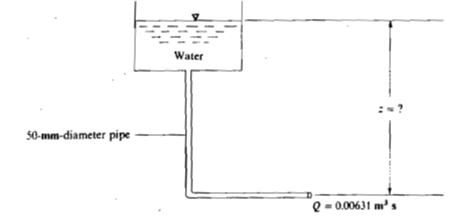

In [19]:
from PIL import Image
img = Image.open(r"figures/87.png")
img

**Given:**

In [20]:
%%render param 4
D=50 #mm 
Q= 0.00631 #m3/s
h_f= 11.58 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The vertical distance can be calculated using the Bernoulli equation between points 1 and 2

$$
\frac{p_1}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{p_2}{\gamma}+z_2+\frac{V_2^2}{2g}+h_f\\
$$

The units of the Bernoulli equation are:

$$ 
p= [Pa]\\
\gamma= [N/m^3]\\
V= [m/s]\\
z= [m]
$$

In the reservoir it can be considered that there is atmospheric pressure and that the velocity is zero. At the end of the pipe there is also atmospheric pressure.

$$
z_1=\frac{V_2^2}{2g}+h_f\\
$$
```

**Solution**

In [22]:
%%render long 3
D_m=D/1000 #m
A_2= pi*D_m**2/4 #m2
V_2= Q/A_2 #m/s
z_1= V_2**2/(2*g)+h_f #m

<IPython.core.display.Latex object>

---
#### Question 4 (**)[R]

If h = 10.5 m in the figure below and the pressures at A and B are 170 and 275 kPa respectively, find the direction of flow and the pipe friction headloss. Assume the liquid has a specific gravity of 0.85. {2.09 m; flow is from B to A}

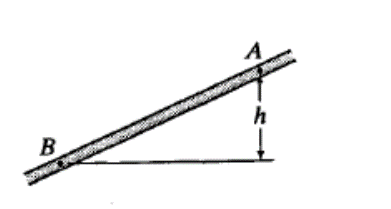

In [32]:
from PIL import Image
img = Image.open(r"figures\88.png")
img

**Given:**

In [39]:
%%render param 2
h=10.5 #m
p_A=170*10**3 #Pa
p_B=275*10**3 #Pa
s=0.85

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Assuming that the flow is from A to B:  

$$
(\frac {p_A}{\rho g}+z_A+\frac {V^{2}}{2g})-h_f=(\frac {p_B}{\rho g}+z_B+\frac {V^{2}}{2g})\\
h_f=(\frac {p_A}{\rho g}+z_A+\frac {V^{2}}{2g})-(\frac {p_B}{\rho g}+z_B+\frac {V^{2}}{2g})\\
$$

Velocity heads cancel:  

$$
h_f=(\frac {p_A}{\rho g}+z_A)-(\frac {p_B}{\rho g}+z_B)\\
$$  

```

**Solution**

In [40]:
%%render long 2
rho_liquid= s*rho_water #kg/m^3
hf= (p_A/(rho_liquid*g)+h)-(p_B/(rho_liquid*g)+0) #m

<IPython.core.display.Latex object>

```{toggle}
The flow is from B to A since the pipe friction head loss is negative.
```

---
#### Question 5 (**)

A 50 mm diameter siphon is drawing oil (s = 0.82) from an oil reservoir as shown below. If the headloss between points 1 and 2 is 1.50 m and between points 2 and 3 is 2.40 m, find the discharge of oil from the siphon and the oil pressure at point 2. {9.1 L/s; -37kPa}

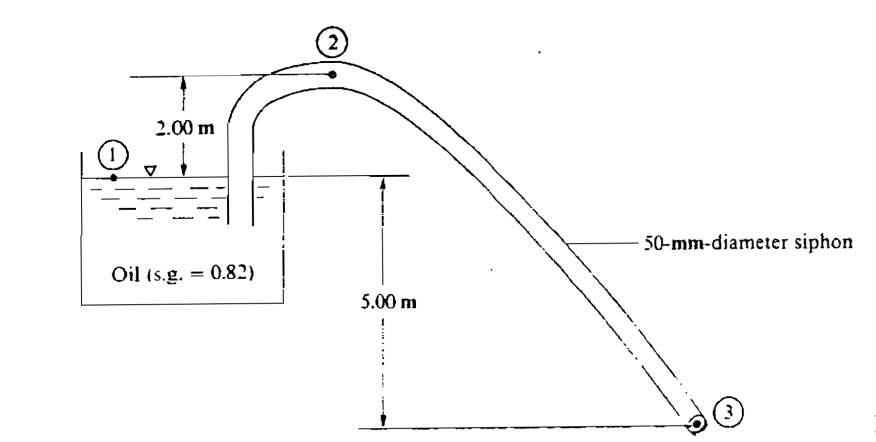

In [62]:
from PIL import Image
img = Image.open(r"figures\89.png")
img

**Given:**

In [41]:
%%render param 2
D= 50 #mm 
SG= 0.82 
h_f_12= 1.50 #m 
h_f_23=2.40 #m 
z_2= 2#m 
z_3= -5 #m 
rho_oil=SG*rho_water #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Bernoulli between points one and three 

$$
\frac{p_1}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{p_3}{\gamma}+z_3+\frac{V_3^2}{2g}+h_{f12} +h_{f23}
$$

In the reservoir it can be considered that there is atmospheric pressure and that the velocity is zero. At the end of the pipe there is also atmospheric pressure.


$$
0=z_3+\frac{V_3^2}{2g}+h_{f12} +h_{f23}\\
V_3=\sqrt{(z_3-h_{f12}-h_{f23})*2g}
$$

Then you can use Bernoulli equation between point one and two:

$$
\frac{p_1}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{p_2}{\gamma}+z_2+\frac{V_2^2}{2g}+h_{f12}
$$

The velocity in points three and two is the same because is the same flow and area. 

$$
0=\frac{p_2}{\gamma}+z_2+\frac{V_2^2}{2g}+h_{f12}
$$
```

**Solution**

In [42]:
%%render long 3
V_3 = ((-z_3-h_f_12-h_f_23)*2*g)**0.5 #m/s
Q= V_3*pi*(D/1000)**2/4 #m3/s
Q_L= Q*1000 #l/s
V_2=V_3 #m/s
p_2= (-z_2-h_f_12-V_2**2/(2*g))*rho_oil*g #Pa
p_2_= p_2/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 6 (***)

Water flows through the system shown below. The reading on the pressure meter is 180 kPa. If the mass flow is 15 kg/s, what is the frictional headloss between points 1 and 2? Assume that 50 % of the losses occur in the nozzle head and draw the energy and hydraulic grade lines of the system. {3.83 m}

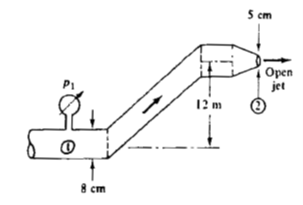

In [37]:
from PIL import Image
img = Image.open(r"figures/90.png")
img

**Given:**

In [43]:
%%render param 2
D_1=0.08 #m
D_2=0.05 #m
p_1= 180000 #Pa
m_flow=15 #kg/s
z_2=12 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The flow rate can be calculated as:

$$Q= \frac{m_{flow}}{\rho}$$

Also, the Bernoulli quation between 1 and 2 is:

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})
$$

We can solve $h_f$:

$$
h_f=(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})
$$

The assumptions for this exercise are:

$$
z_1= 0\hspace{0.2cm}(datum),\hspace{0.2cm}p_2= 0\hspace{0.2cm}(atmosferic)
$$


Now, to draw the energy and hydraulic grade lines of the system we need to now the energy before and after the nozzle. We know that 50 % of the losses occur in the nozzle head, therefore the energy before the nozzle is equal to the energy in 1 minus the 50% of the losses.

$$
h_{BeforeNozzle}=(\frac {p_1}{\gamma}+\frac {V_{1}^{2}}{2g})-(0.5h_f)
$$

Considering that afterthe nozzle the pressure is atmosferic, the eergy after the nozzle can be calculated as:

$$
h_{AfterNozzle}=\frac {V_{2}^{2}}{2g}+z_2
$$


```

**Solution**

In [52]:
%%render long 2
Q= m_flow/rho_water #m3/s
A_1= pi*D_1**2/4 #m2
V_1= Q/A_1 #m/s
A_2= pi*D_2**2/4 #m2
V_2= Q/A_2 #m/s
hf= (p_1/(rho_water*g)+V_1**2/(2*g))-(z_2+V_2**2/(2*g)) #m

h_BeforeNozzle= (p_1/(rho_water*g)+V_1**2/(2*g))-0.5*hf #m
h_AfterNozzle= z_2+V_2**2/(2*g) #m


<IPython.core.display.Latex object>

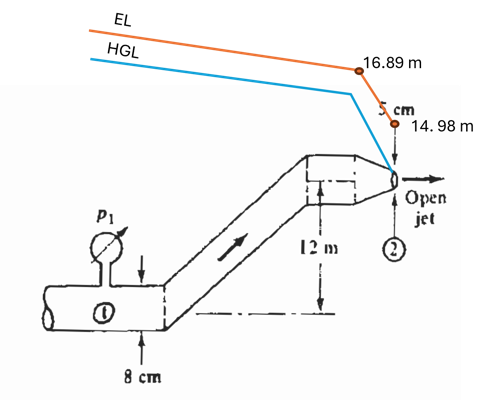

In [43]:
img = Image.open(r"figures/90S.png")
img= img.resize((500,400))
img

---
#### Question 7 (***)[R]

7. The friction losses in the suction pipe of the system shown in the figure below are given by the equation $h_L=1.6 \frac {V^2}{2g}$. The barometer reading is 90 kPa and the suction pipe has a velocity of 1.8 m/s. What is the maximum allowable value of z if the liquid is a) water at 20 C and b) petrol with a vapour pressure of 49 kPa and a specific weight of 8 kN/m<sup>3</sup>? {8.53 m; 4.70 m}

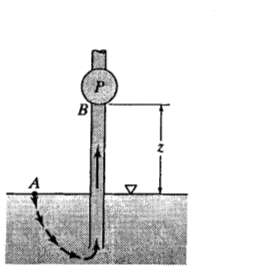

In [66]:
from PIL import Image
img = Image.open(r"figures/91.png")
img

**Given:**

In [31]:
%%render param
V_B=1.8 #m/s
p=90 #kPa
p_v_gasoline=49 #kPa 
gamma_gasoline = 8# kN/m3


<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The maximum value of z can be calculated using the Bernoulli equation:

$$
\frac{p_A}{\gamma}+z_A+\frac{V_A^2}{2g}=\frac{p_v}{\gamma}+z_{max}+\frac{V_B^2}{2g} +h_L\\
\frac{p_A}{\gamma}=\frac{p_v}{\gamma}+z_{max}+\frac{V_B^2}{2g} +h_L\\
$$

The values of $P_v$ and $\gamma$ can be obtained of the Table A.1 for water at 20C: 

$$ \gamma = 9.789 kN/m^3\\
p_{vwater}= 2.34 kN/m^2$$
```

**Solution**

In [32]:
%%render long 2
gamma_water = 9.789 #kN/m3
p_v_water= 2.34 #kN/m2
z_max = 90/gamma_water-p_v_water/gamma_water-V_B**2/(2*g)-1.6 *V_B**2/(2*g) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The maximum value of z can be calculated using the Bernoulli equation:

$$
\frac{p_A}{\gamma}+z_A+\frac{V_A^2}{2g}=\frac{p_v}{\gamma}+z_{max}+\frac{V_B^2}{2g} +h_L\\
\frac{p_A}{\gamma}=\frac{p_v}{\gamma}+z_{max}+\frac{V_B^2}{2g} +h_L\\
$$

The values of $p_v$ is 49 kPa
```

**Solution**

In [33]:
%%render long 2
z_max = 90/gamma_gasoline-p_v_gasoline/gamma_gasoline-V_B**2/(2*g)-1.6 *V_B**2/(2*g) #m

<IPython.core.display.Latex object>

---
#### Question 8 (***)

Water flows between two tanks as shown in the figure below. The flowrate through
the pipe is 16 l/s, and the saturation vapour pressure of the water is -93 kPa. Answer the
following question:  

a. What is the total headloss in the system of flow between the tanks? {15 m}  

b. At what diameter d of the pipe constriction will cavitation start? Assume that the
additional head loss due to the constriction is negligible. {31.3 mm}

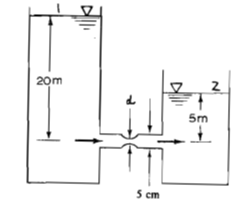

In [45]:
img = Image.open(r"figures/92.png")
img

**Given:**

In [53]:
%%render param 
Q=16/1000 #m3/s
p_v=-93*1000 #Pa
z_1=20 #m
z_2=5 #m
D=5/100 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The total headloss in the system of flow between the tanks can be calculated with the Bernoulli equation as follows:  

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})\\
h_f=(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})\\
$$

The assumptions of the exercise are:  

$$
V_1=0, \hspace{0.5cm} V_2=0,\hspace{0.5cm}p_1=0, \hspace{0.5cm}p_2=0\\
$$

```

**Solution**

In [55]:
%%render long
h_f= z_1-z_2 #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
Considering the Bernoulli equation:  

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})
$$

and the assumptions of the problem:  

$$
V_1=0, \hspace{0.5cm}p_1=0, \hspace{0.5cm}z_2=0
$$

we can solve $V_2$:

$$
V_2=\sqrt{2g(z_1-h_f-\frac {p_2}{\gamma}}
$$

The velocity in which cavitation starts will be achieved when the pressure is equal to saturation vapour pressure and assuming that the head loss to the constriction is half of the total head loss. Then, the diameter can be solved using the following equation:

$$
Q= V A
$$
```

**Solution**

In [57]:
%%render long
h_f_= h_f/2
V_2= sqrt(2*g*(z_1-h_f_-p_v/(rho_water*g))) #m/s
A_2= Q/V_2 #m2
D_2= sqrt(4*A_2/pi) #m

<IPython.core.display.Latex object>

### Power

---
#### Question 9 (**)

A 150 mm diameter pipe is discharging water through a turbine. The velocity in the pipe just upstream of the turbine is 36 m/s and the pressure 100 m. The pipe diameter remains the same on the downstream side of the turbine. Calculate the maximum power that the turbine can deliver if losses are ignored. {624.09 kW}

**Given:**

In [44]:
%%render param 
D= 150 #mm
V= 36 #m/s
h= 100 #m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The maximum power can be calculated with the following equation:

$$
p= \rho ghQ
$$

The units of the variables are:

$$
\rho= [kg/m^3]\\
h=[m]\\
Q= [m^3/s]\\
g=[m/s^2]
$$
```

**Solution**

In [46]:
%%render long 2
A= pi*(D/1000)**2/4 #m2
Q= V*A #m3/s
p= (rho_water*g*h*Q)/1000 #kW

<IPython.core.display.Latex object>

---
#### Question 10 (**)[R]

A pump with efficiency 90% lift water between two reservoir with a water level difference of 155 m at a flow rate of 7.5 m<sup>3</sup>/s. The friction head loss in the pipe is 13 m. What is the input power requirement of the pump? {13.73 MW}

**Given:**

In [47]:
%%render param 1
eta=0.9
dz=155 #m
Q=7.5 #m3/s
h_f=13 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the input power requirement of the pump, first we need the pump height. This can be calculated with the Bernoulli equation as follows:  

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_f=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})-h_{pump}\\
V_1=0, \hspace{0.5cm} V_2=0,\hspace{0.5cm}p_1=0, \hspace{0.5cm}p_2=0\\
z_1-h_f=z_2-h_{pump}\\
h_{pump}=z_2-z_1+h_f
$$

Then, the power of the pump in kW can be calculated as:  

$$P_{out}= \frac{\rho g h_{pump} Q}{1000}$$

Finally, considering the efficency of the pump, the input power is:

$$P_{in}= \frac{P_{out}}{\eta}$$

```

**Solution**

In [49]:
%%render long 2
h_pump= dz+h_f #m
P_out= (rho_water*g*h_pump*Q)/1000 #kW
P_in= P_out/eta #kW
P_in_= P_in/1000 #MW

<IPython.core.display.Latex object>

---
#### Question 11 (**)

After entering a pump through a 180 mm diameter pipe at 35 kPa, oil (s = 0.82) leaves the pump through a 120 mm diameter pipe at 120 kPa. The suction and discharge sides of the pump are at the same elevation. Find the rate at which energy is delivered to the oil by the pump if the flow rate is 70 L/s. {6.83 kW}

**Given:**

In [50]:
%%render param 2
D_in= 180 #mm 
p_in= 35 #kPa 
SG= 0.82 
D_out = 120 #mm
p_out= 120 #kPa
Q= 70 #L/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The rate at which the energy is delivered can be calculated as:

$$
Rate = \rho_{fluid} g h_p Q
$$

The heigh of the pump can be calculated with the Bernoulli equation

$$
\frac{p_{in}}{\gamma}+\frac{V_{in}^2}{2g}+h_p=\frac{p_{out}}{\gamma}+\frac{V_{out}^2}{2g}\\
h_p=\frac{p_{out}}{\gamma}+\frac{V_{out}^2}{2g}-\frac{p_{in}}{\gamma}-\frac{V_{in}^2}{2g}
$$
```

**Solution**

In [51]:
%%render long 2

V_in= 4*(Q/1000)/(pi*(D_in/1000)**2) #m/s
V_out= 4*(Q/1000)/(pi*(D_out/1000)**2) #m/s
h_p= p_out/ (SG*g) + V_out**2/(2*g)-p_in/(SG*g) -V_in**2/(2*g) #m
Rate_energy= (SG*rho_water*g*h_p*(Q/1000))/1000 #kW

<IPython.core.display.Latex object>

---
#### Question 12 (***)

Water is supplied from a reservoir to a powerhouse that is located at an elevation of 325 m below that of the reservoir surface (see figure). The jet has a nozzle diameter of 250 mm with a velocity of 75 m/s through the nozzle. Determine the power loss due to friction between the reservoir and the jet, as well as the potential power of the jet. Draw the energy and hydraulic grade lines of the system assuming that 15 % of the friction losses occur in the nozzle. {1383.34 kW; 10.35 MW}

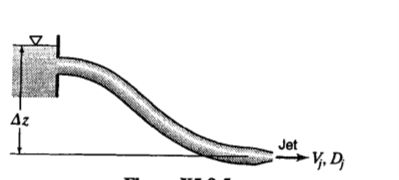

In [63]:
img = Image.open(r"figures/96.png")
img

**Given:**

In [52]:
%%render param 2
z_1= 325 #m
D_2= 250/1000 #m
V_2=75 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the power loss to friction we need the height loss to friction:

$$
(\frac {p_1}{\gamma}+z_1+\frac {V_{1}^{2}}{2g})-h_L=(\frac {p_2}{\gamma}+z_2+\frac {V_{2}^{2}}{2g})\\
p_1=0,\hspace{0.5cm} V_1=0, \hspace{0.5cm}z_2=0, \hspace{0.5cm}p_2=0\\
h_L=z_1-(\frac {V_{2}^{2}}{2g})
$$

For the potential power of the jet, the height will be:

$$h_2=\frac {V_{2}^{2}}{2g}$$

The power in both cases can be calculated with the following equation:

$$P= \frac{\rho g h Q}{1000}$$
```

**Solution**

In [54]:
%%render long 2

h_L= z_1-(V_2**2)/(2*9.81) #m
A_2= pi*D_2**2/4 #m2
Q= V_2*A_2 #m3/s
h_2= V_2**2/(2*g) #m
P_loss= (rho_water*g*h_L*Q)/1000 #kW
P_jet= (rho_water*g*h_2*Q)/1000 #kW
P_jet_= P_jet/1000 #MW

<IPython.core.display.Latex object>

## Problems for Lecture 17: Laminar flow in pipes

### Reynolds number

---
#### Question 1 (*)

Crude oil with a kinematic viscosity of 1 x 10-3 m<sup>2</sup>/s flows through a 100 mm pipe at 5 m/s. Calculate the Reynolds number of the flow. Will the flow be laminar or turbulent? {500; laminar}

**Given:**

In [55]:
%%render param 
nu= 1*10**-3 #m2/s
D= 100 #mm 
V= 5 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The reynolds number can be calculated as:

$$
Re= \frac{VD}{\nu}
$$
```

**Solution**

In [56]:
%%render long 1
D_m=(D/1000)
Re= V*D_m/nu #Laminar

<IPython.core.display.Latex object>

---
#### Question 2 (*)

Water at 15 °C flows through a 100 mm pipe at 5 m/s. Calculate the Reynolds number of the flow. Will the flow be laminar or turbulent? {438,596; turbulent}

**Given:**

In [57]:
%%render param 1
D= 100/1000 #m
V= 5 #m/s
T=15 #°C

<IPython.core.display.Latex object>

**Hint**

```{toggle}
In Table A.1 the viscosity of water at 15 °C is 1.14 x10<sup>-6</sup> m<sup>2</sup>/s

$$
Re= \frac{VD}{\nu}
$$
```

**Solution**

In [58]:
%%render long 0

nu= 1.14*10**-6 #m2/s
Re= V*D/nu

<IPython.core.display.Latex object>

```{toggle}
As Re is > 4000, the flow is turbulent.
```

---
#### Question 3 (*)[R]

Water at 15 °C flows through a 100 mm pipe. What is the maximum velocity and flow rate for the flow to be laminar? {0.023 m/s; 0.179 L/s}

**Given:**

In [77]:
%%render param 6
nu=1.14*10**-6
D=100 #mm
Re_max = 2000

<IPython.core.display.Latex object>

**Hint**

```{toggle}
In Table A.1 the viscosity of water at 15 °C is 1.14 x10<sup>-6</sup> m<sup>2</sup>/s

$$
Re= \frac{VD}{\nu}
$$
```

**Solution**

In [78]:
%%render long 3

V= nu*Re_max/(D/1000) #m/s
A= pi*(D/1000)**2/4 #m2
Q= V*A*1000 #L/s

<IPython.core.display.Latex object>

### Laminar pipe friction losses

---
#### Question 4 (*)

A pipe with diameter 100 mm and length 1000 m carries water at 15 °C. Calculate:  

a. The maximum flow rate to which laminar flow will occur in the pipe. {0.18 L/s} 

b. The head loss in the pipe at this flowrate. {0.0085 m}

**Given:**

In [74]:
%%render param 1
D= 100/1000 #m 
L= 1000 #m 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
In Table A.1 the viscosity of water at 15 °C is 1.14 x10<sup>-6</sup> m<sup>2</sup>/s

To calculate the maximum flow rate consider the following equations:  

$$
Re= \frac{VD}{\nu}\\
V=\frac{Re*\nu}{D}\\
Q=VA
$$ 

```

**Solution**

In [76]:
%%render long 2
V= 2000*nu/(D) #m/s
A= pi*(D)**2/4 #m2
Q= V*A #M3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
As it is laminar flow we can calculate the head loss with following equation:


$$
h_f = 32  \nu  V  \frac{L}{g  \left(\frac{D}{1000}\right)^2}
$$


```

**Solution**

In [78]:
%%render long 4
h_f= 32*nu*V*L/(g*(D)**2) #m

<IPython.core.display.Latex object>

---
#### Question 5 $\text{(*)(***)}$

 Oil with μ = 4.8 x 10-2 kg/ m and ρ = 800 kg/m<sup>3</sup> flows through a 25 mm diameter pipe with a mean velocity of 0.3 m/s. Check that the flow in the pipe is laminar and then calculate (a) the head loss in a pipe with a length of 45 m, and (b) the maximum velocity in the pipe cross section. {4.23 m of oil; 0.6 m/s}

**Given:**

In [80]:
%%render param
mu=4.8*10**-2 #kg/3
rho=800 #kg/m3
D=25/1000
V=0.3 #m/s
L=45 #m

<IPython.core.display.Latex object>

a)*

**Hint**

```{toggle}
To determine the head loss and maximum velocity, it is essential to first identify the type of flow using the Reynolds equation

$$
Re= \frac{VD}{\nu}
$$

For laminar flow: Re < 2000

$$ 
f=\frac {64}{Re}
$$

For turbulent flow Re > 4000

$$
\frac{1}{\sqrt {f}}= -2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})
$$

The head loss is 

$$ 
h_f= fL \frac {V^2}{2gD}
$$
```

**Solution**

In [81]:
%%render long 2
Re= rho*D*V/mu
h_f= (32*mu*L*V)/(rho*g*D**2) #m

<IPython.core.display.Latex object>

b)***

**Hint**

```{toggle}
To find the maximum velocity the following equation is used:

$$
u_r=-\frac{1}{4\mu}\frac{dp*}{dL}(R^{2}-r^{2})
$$

As the maximum velocity ocurrs at the pipe centreline:

$$
r=0
$$
```

**Solution**

In [36]:
%%render long 2
r=0
dp= -rho*g*h_f #N/m2
dL= L #m
R= D/2 #m
U_max= -1/(4*mu)*(dp/dL)*R**2 #m/s

<IPython.core.display.Latex object>

## Problems for Lecture 18: Turbulent flow in pipes

### Turbulent pipe friction losses 

---
#### Question 1 (*)

Calculate the head loss in the pipes below for Reynolds numbers of 1 500 and 150 000 

 a)	A 100 mm internal diameter pipe with a length of 1000 m and an absolute roughness of 0.01 mm. {6.36 x 10<sup>-3</sup> m; 25.60 m}
 
 b)	A 200 mm internal diameter pipe with a length of 1000 m and an absolute roughness of 0.1 mm.  {0.8 x 10<sup>-3</sup> m; 3.63 m}
 
 c)	A 150 mm internal diameter pipe with a length of 2000 m and an absolute roughness of 0.01 mm. {3.77 x 10<sup>-3</sup> m; 14.96 m}


a)

**Given:**

In [82]:
%%render param 6
D =100/1000 #m
L= 1000 #m
e= 0.01/1000 #m 
Re_L= 1500 #Laminar
Re_T=150000 #Turbulent
nu= 1.14 *10**-6 #m/s2

<IPython.core.display.Latex object>

**Hint**

```{toggle}
A Reynolds number of 1500 means the flow is laminar, while a Reynolds number of 150000 is for turbulent flow. For that reason, for each question two answers must be provided. 

The first step is to calculate the flow velocity with Reynolds equation: 

$$
Re= \frac{VD}{\nu}\\
V= \frac {Re\nu}{D}
$$

Once the flow velocity is determined, the friction factor and head loss can be calculated using the following equations, depending on the type of flow. 

The equation for laminar flow is: 

$$ 
f=\frac {64}{Re}
$$

The equation for turbulent flow is:

$$
\frac{1}{\sqrt {f}}= -2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})
$$

The head loss is 

$$ 
h_f= fL \frac {V^2}{2gD}
$$

```


**Solution**

1. For Re<sub>L</sub> = 1500 (Laminar)

In [83]:
%%render long 3
V= Re_L*nu/D #m/s
f=64/ Re_L
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

2. For Re<sub>T</sub> = 15000 (Turbulent)

In [84]:
%%render long 3
f= (1/(-2*log10(5.74/(Re_T**0.9)+(e/(3.7*D)))))**2
V= Re_T*nu/D #m/s
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

b)

**Given:**

In [647]:
%%render param 6
D =200/1000 #m
L= 1000 #m
e= 0.1/1000 #m 
Re_L= 1500 #Laminar
Re_T=150000 #Turbulent
nu= 1.14 *10**-6 #m/s2

<IPython.core.display.Latex object>

**Solution**

1. For Re<sub>L</sub> = 1500 (Laminar)

In [648]:
%%render long 5
V= Re_L*nu/D #m/s
f=64/ Re_L
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

2. For Re<sub>T</sub> = 15000 (Turbulent)

In [649]:
%%render long 
f= (1/(-2*log10(5.74/(Re_T**0.9)+(e/(3.7*D)))))**2
V= Re_T*nu/D #m/s
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

c)

**Given:**

In [650]:
%%render param 6
D =150/1000 #m
L= 2000 #m
e= 0.01/1000 #m 
Re_L= 1500 #Laminar
Re_T=150000 #Turbulent
nu= 1.14 *10**-6 #m/s2

<IPython.core.display.Latex object>

**Solution**

1. For Re<sub>L</sub> = 1500 (Laminar)

In [651]:
%%render long 5
V= Re_L*nu/D #m/s
f=64/ Re_L
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

2. For Re<sub>T</sub> = 15000 (Turbulent)

In [652]:
%%render long 
f= (1/(-2*log10(5.74/(Re_T**0.9)+(e/(3.7*D)))))**2
V= Re_T*nu/D #m/s
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)

Determine i) the flow regime (laminar, transitional, smooth turbulent, transitional turbulent or rough turbulent) and ii) the headloss for each of the systems described below:  

a. A pipe with diameter 200 mm carries water at 10 °C with a velocity of 0.01 m/s. The pipe has an absolute roughness of 0.2 mm and a length of 1000 m? {laminar; 0.0011 m}  

b. A pipe with diameter 200 mm carries water at 10 °C with a velocity of 0.1 m/s. The pipe has an absolute roughness of 0.2 mm and a length of 1000 m. {transitional turbulent; 0.074 m}  

c. A pipe with diameter 200 mm carries water at 10 °C with a velocity of 10 m/s. The pipe has an absolute roughness of 0.2 mm and a length of 1000 m. {505.86 m}

**Hint**

```{toggle}
The flow regime can be determined with the Reynolds number and the Moody diagram considering:

$$
Re= \frac{VD}{\nu}\\
Relative Roughness= \frac{e}{D}\\
$$

where $e$ is the pipe absolute roughness and $\nu$ can be found in Table A.1.

If the flow regime is laminar the head loss can be calculated using the following equation:  

$$
h_f = 32  \nu  V  \frac{L}{g  \left(\frac{D}{1000}\right)^2}
$$

for the others flow regimes the head loss can be calculated as:

$$
h_f = f  L  \frac{V^2}{2  g  D}
$$


where:

$$
f = \left( \frac{1}{-1.8  \log_{10} \left( \left( \frac{\varepsilon}{3.7  D} \right)^{1.11} + \frac{6.9}{Re} \right)} \right)^2
$$



```


a)

**Given:**

In [59]:
%%render param 2
D=200/1000 #m
T=10 #°C
V=0.01 #m/s
e=0.2/1000 #m
L=1000 #m

<IPython.core.display.Latex object>

**Solution**

In [60]:
%%render long 7
nu=1.306*10**-6 #m2/s
Re= V*D/nu #laminar
h_f= (32*nu*V*L)/(g*D**2) #m

<IPython.core.display.Latex object>

b)

**Given:**

In [62]:
%%render param 4
D=200/1000 #m
T=10 #°C
V=0.1 #m/s
e=0.2/1000 #m
L=1000 #m

<IPython.core.display.Latex object>

**Solution**

In [63]:
%%render long 3
Re= V*D/nu
RelativeRoughness= e/D
f= (1/(-1.8*log10((e/(3.7*D))**1.11+(6.9/Re))))**2
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

```{toggle}
From the Moody Diagram, it can be tell that the flow is transitional turbulent.
```

c)

**Given:**

In [64]:
%%render param 4
D=200/1000 #m
T=10 #°C
V=10 #m/s
e=0.2/1000 #m
L=1000 #m

<IPython.core.display.Latex object>

**Solution**

In [65]:
%%render long 3
Re= V*D/nu #turbulent
f= (1/(-1.8*log10((e/(3.7*D))**1.11+(6.9/Re))))**2
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

---
#### Question 3 (*)(**)[R]

A pipe with diameter 150 mm has an absolute roughness of 0.2 mm and a length of 500 m carries water at 15 °C.

a)	*What is the maximum flow rate at which the water flow in the pipe will be laminar, and what will the head loss through the pipe be at this flow rate? {0.27 L/s; 0.001 m}

b)	*If the velocity of water in the pipe is 2 m/s, what will the head loss in the pipe be? {15 m}

c)	**If the Reynolds number of the flow in the pipe is 100 000, what will the head loss of the pipe be per kilometer of pipe? {2.3 m}


**Given:**

In [66]:
%%render param 6
D= 150/1000 #m 
e= 0.2/1000 #m 
L= 500 #m 
nu=1.14*10**-6 #m/s2

<IPython.core.display.Latex object>

a) Laminar Re= 2000

**Hint**

```{toggle}
The first step is calculated the flow velocity using Reynolds equation:

$$ 
V= \frac {Re\nu}{D}
$$

The flow rate is 

$$Q=V*A$$


And the head loss in laminar flow is:

$$ 
h_f= 32vV \frac {L}{gD^2}
$$
```

**Solution**

In [67]:
%%render long 
Re=2000
V= Re*nu/D #m/s
A= pi*D**2/4 #m2
Q= V*A #m3/s
Q_L= Q*1000 #L/s
h_f= 32*nu*V*L/(g*D**2) #m

<IPython.core.display.Latex object>

b) 

**Hint**

```{toggle}
The friction loss for turbulent flow is

$$
f=(\frac {1}{-2log_{10}(\frac {5.47}{Re^{0.9}}+ \frac {e}{3.7D})})^2
$$

The head loss is 

$$
h_f= fL\frac {V^2}{2gD}
$$
```



**Solution**

In [68]:
%%render long 
V= 2 #m/s
Re = V*D/nu #Turbulent
f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The first step is calculate the flow velocity with the Reynolds number 

$$ V=\frac {Re\nu}{D}$$

Once the velocity is calculated, the friction factor and head loss can be determined using the following equations applicable to turbulent flow


$$
f=(\frac {1}{-2log_{10}(\frac {5.47}{Re^{0.9}}+ \frac {e}{3.7D})})^2
$$

The head loss is 

$$
h_f= fL\frac {V^2}{2gD}
$$
```

**Solution**

In [69]:
%%render long 
Re = 100000 
V= Re*nu/D #m/s
f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_f= f*L*V**2/(2*g*D) #m

<IPython.core.display.Latex object>

---
#### Question 4 (**)

Select any pipe diameter between 20 and 500 mm. Assume a pipe roughness of 0.2 mm 
and a length of 1 km. Ensure that you cover the full range from laminar to rough turbulent 
flow and calculate both laminar and turbulent head loss in the transitional zone. Plot the 
following parameters as a function of the Reynolds number:  
• Velocity  
• Flow rate  
• Darcy-Weisbach friction factor f (for turbulent flow only - plot it on a copy of the 
Moody diagram)   
• Pipe head loss  

Indicate the following areas on your graphs:  
• Laminar, transitional and turbulent flow  
• Smooth turbulent, transitional turbulent and rough turbulent flow  

**Hint**

```{toggle}
We can assum $\nu=1.14*10^{-6} (m/s^2)$, select different diameters within the given range and then calculate the parameters using the following equations:

$$
Q=V*A\\
$$

for laminar flow:  

$$
f=64/Re\\
$$

$$
h_f= \frac{fLV^2}{2gD}\\
$$

for turbulent flow:  

$$
f=(\frac{1}{-2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})})^2\\
$$

Alternatively $f$ can be estimated using the Moody diagram. 

$$
h_f= \frac{fLV^2}{2gD}\\
$$
```

---
#### Question 5 (**)

A 200 mm diameter reinforced siphon is drawing water at 20°C from the reservoir as shown below. The friction factor of the siphon f = 0.023 and its length from the inlet to Point 2 is equal to 3 m. Assume standard sea level atmospheric conditions and that the siphon between points 2 and 3 hangs vertically down. Calculate the minimum value of z at which cavitation in the system will occur. What will the system flow rate be? {30.86 m; 342.4 L/s }

**Given:**

In [70]:
%%render param 
D= 200/1000 #m 
f=0.023 
L= 3 #m 
z_2= 2 #m 
p_vap = 2.34*1000 #Pa

<IPython.core.display.Latex object>

**Hint for Velocity 2**

```{toggle}
To calculate the minimum value of z and the flow rate the Bernoulli equation needs to be used for points 1 and 2 and then point one and three.

$$
\frac{p_1}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{p_2}{\gamma}+z_2+\frac{V_2^2}{2g}+h_f
$$

In the reservoir it can be considered that there is atmospheric pressure and that the velocity is zero.

$$
\frac{p_{atm}}{\gamma}=\frac{p_{vap}}{\gamma}+z_2+\frac{V_2^2}{2g}+\frac{f*V_2^2*L}{2*g*D}
$$

$$
\frac{p_{atm}}{\gamma}=\frac{p_{vap}}{\gamma}+z_2+\frac{V_2^2}{2*9.81}+\frac{0.023*V_2^2*3}{2*9.81*0.2}
$$

$$
\frac{p_{atm}}{\gamma}=\frac{p_{vap}}{\gamma}+z_2+ 0.0510V_2^2+0.0176V_2^2
$$
```

**Solution V2**

In [71]:
%%render long 
V_2= ((((p_atm /(rho_water*g))- p_vap /(rho_water*g)-z_2))/0.0681)**0.5 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Bernoulli between points one and three 

$$
\frac{p_{atm}}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{P_{3}}{\gamma}+z_3+\frac{V_3^2}{2g}+h_f
$$

At the end of the pipe there is also atmospheric pressure. Velocity in point two and three is the same.

$$
0=z_3+\frac{V_3^2}{2g}+\frac{0.023*V_3^2*L_T}{2*9.81*0.2}
$$

$$
L_T = 3+2+z_3\\
$$

$$
0=z_3+\frac{V_3^2}{2*9.81}+\frac{0.023*V_3^2*(5+z_3)}{2*9.81*0.2}\\
$$

Doing every term separately:

$$
\frac{V_3^2}{2*9.81}= \frac{10.89^2}{2*9.81} =6.055 
$$

$$
\frac{0.023*V_3^2*(5+z_3)}{2*9.81*0.2}=\frac{0.023*10.89^2*(5)}{2*9.81*0.2}= 3.482 
$$

$$
\frac{0.023*V_3^2*(5+z_3)}{2*9.81*0.2}=\frac{0.023*10.89^2*(z_3)}{2*9.81*0.2}= 0.692*z_3\\
$$

At the end we have

$$
-z+6.055 + 3.482+ 0.296*z=0\\
z= \frac {9.537}{0.309}
$$
```

**Solution**

In [72]:
%%render long 
terms= V_2**2/(2*g)+f*V_2**2*5/(2*g*D)
Z= terms / 0.309 #m
A= pi*D**2/4 #m2
Q= V_2*A #m3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

---

#### Question 6(***)[R]

If the diameter of a pipe is doubled, what effect does this have on the flow rate 
for a given headloss if the flow is   

a) laminar and   
b) rough turbulent.  

{increase flow by a ratio of 16; 5.7}

**Hint**

```{toggle}
To see the effect of diameter on the flow rate given a headloss, we must write the headloss in terms of the diameter and flow rate, i.e., replacing velocity with:  

$$V=\frac{Q}{\frac{\pi D^2}{4}}$$


For laminar flow:  

$$
h_f= \frac{32\nu VL}{gD^2}
$$

For turbulent flow:  

$$
h_f= \frac{fLV^2}{2gD}
$$

```

a)

**Solution**

```{toggle}

$$
h_f= \frac{32\nu VL}{gD^2}\\
= \frac{32\nu (\frac{Q}{A})L}{gD^2}\\
= \frac{32\nu (\frac{Q}{\frac{\pi D^2}{4}})L}{gD^2}\\
= \frac{32\nu 4QL}{\pi gD^4}\\
$$

If the head loss is given, the flow rate is proportonial to: 

$$
Q \propto D^4
$$

If the diameter is double, the flow rate will increase by a ratio of 16

$$
Q \propto 2^4=16
$$

```


b)

**Solution**

```{toggle}

$$
h_f= \frac{fLV^2}{2gD}\\
= \frac{fL(\frac{Q}{A})^2}{2gD}\\
= \frac{fL(\frac{Q}{\frac{\pi D^2}{4}})^2}{2gD}\\
= \frac{fLQ^2}{2gD(\frac{\pi D^2}{4})^2}\\
= \frac{fLQ^2}{2gD^5\frac{\pi^2}{16}}\\
$$

If the head loss is given, the flow rate is proportonial to: 

$$
Q \propto \sqrt{D^5}
$$

If the diameter is double, the flow rate will increase by a ratio of 5.7

$$
Q \propto \sqrt{2^5}=5.6568
$$

```


### Turbulent flow rate

---

#### Question 7(***)

The system shown below has a pipe diameter of 350 mm, a friction coefficient f = 0.016. The distances BC is 12 m, DE is 920 m and $ \Delta z$ is 48 m. Find the maximum theoretical flow rate if water at 15 °C is pumped in the system at an altitude of 1000 m above sea level. Point C is 6 m above the lower water surface. Work from basic principles and assume f remains constant. {0.59 m3/s}

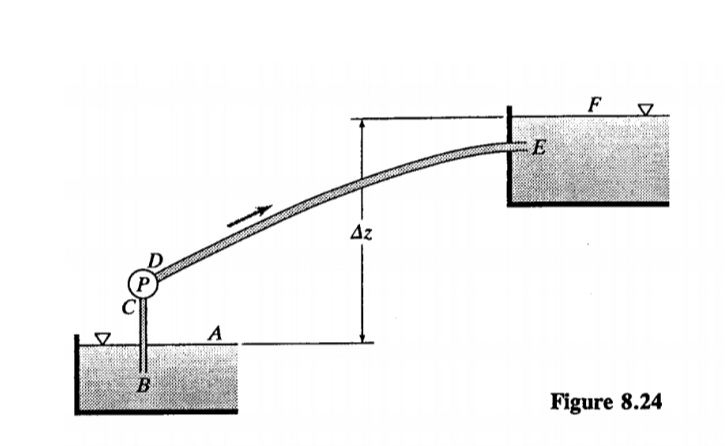

In [673]:
img = Image.open(r"figures/110.png")
img

**Given:**

In [73]:
%%render param 
D= 350/1000 #m 
f= 0.016 
L_BC= 12 #m 
L_DE= 920 #m 
Delta_z= 48 #m
H= 1000 #m 
z_c= 6 #m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Table A.1, water in 15°C the $\frac{p_v}{\gamma}$= 0.17 m 

Table A.3 for 1000 m elevation $p_{atm}$= 89.876 kPa abs

$$
\frac{p_{atm}}{\gamma}=89.9 /9.81= 9.16 m
$$

Using Bernoulli equation between water surface A to pump intake C using absolute pressure heads when $p_C=p_v$

$$
\frac{p_{atm}}{\gamma}+z_1+\frac{V_1^2}{2g}=\frac{p_{3}}{\gamma}+z_c+\frac{V_3^2}{2g}+h_f
$$

The velocity in those to points is the same:

$$
\frac{p_{atm}}{\gamma}+\frac{V^2}{2g}=\frac{p_{v}}{\gamma}+z_c+\frac{V^2}{2g}+\frac {fLV^2}{2gD}
$$

$$
9.16=0.17+6+\frac{V^2}{2g}+\frac {0.016*12V^2}{2*9.81*0.35}
$$

$$
9.16-6-0.17 =\frac{V^2}{2g}(0.549+1)\\
$$

$$
2.99= 1.549\frac{V^2}{2g}
$$
```

**Solution**

In [74]:
%%render long 2
V= ((2.99/1.549)*2*g)**0.5 #m/s
A= pi*D**2/4 #m2
Q= V*A #m3/s

<IPython.core.display.Latex object>

### Pipe diameter

---
#### Question 8 (****)

Calculate the flow rate through a 160 mm diameter pipe with length 2000 m and absolute roughness 0.01 mm if the head loss in the pipe is 35 m. In what turbulent flow zone will this flow fall? Use water at 15°C {38.0 l/s, transitional turbulent}

**Given:**

In [92]:
%%render param 5
D=160/1000 #m
L=2000 #m
e=0.01/1000 #m
h_f=35 #m
T=15 #°C

<IPython.core.display.Latex object>

**Hint**

```{toggle}
As the relative roughness is:  

$$
\frac{e}{D}=\frac{0.00001 m}{0.16 m}=6.25*10^{-5}
$$

From the Moddy diagram,  

$$
0.011<f<0.04
$$

We select one value of f from the range, then we calculate the following until f doesn't change: 

$$
V_1= (\frac{2gDh_f}{fL})^{0.5}\\
Re_1=\frac{VD}{\nu}\\
f_2=(\frac{1}{-2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})})^2\\
$$

Once we have found f, we can calculate the flow rate as $Q=VA$

```

**Solution**

In [93]:
#Iteration process
df=1000
f_1=0.011 #It could be any f from 0.011 to 0.04
iteration=1
while df>=0.00000001:
    V_1=((2*g*D*h_f)/(f_1*L))**0.5
    Re_1=((V_1*D)/1)/(1.14*10**-6)
    f_2=(1/(-2*log10((5.74/Re_1**0.9)+(e/(3.7*D)))))**2
    V_2=((2*g*D*h_f)/(f_2*L))**0.5
    Re_2=((V_2*D)/1)/(1.14*10**-6)
    f_3=(1/(-2*log10((5.74/Re_2**0.9)+(e/(3.7*D)))))**2
    df=abs(f_3-f_2)
    f_1=f_3
    print("iteration:",iteration,", f1:",round(f_1,4),", V1:",round(V_1,3),", Re1:",round(Re_1,1),", f2:",round(f_2,4),", V2:",round(V_2,3),", Re2:",round(Re_2,1),", f3:",round(f_3,7),", df:",round(df,10))
    iteration=iteration+1


iteration: 1 , f1: 0.0153 , V1: 2.235 , Re1: 313651.5 , f2: 0.015 , V2: 1.916 , Re2: 268918.4 , f3: 0.0153246 , df: 0.000360659
iteration: 2 , f1: 0.0154 , V1: 1.893 , Re1: 265735.1 , f2: 0.0154 , V2: 1.892 , Re2: 265485.2 , f3: 0.0153558 , df: 2.2861e-06
iteration: 3 , f1: 0.0154 , V1: 1.891 , Re1: 265465.4 , f2: 0.0154 , V2: 1.891 , Re2: 265463.9 , f3: 0.015356 , df: 1.43e-08
iteration: 4 , f1: 0.0154 , V1: 1.891 , Re1: 265463.8 , f2: 0.0154 , V2: 1.891 , Re2: 265463.7 , f3: 0.015356 , df: 1e-10


In [96]:
%%render long 2
A= pi*D**2/4 #m2
Q= V_2*A #m3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

---
#### Question 9 (***)

A steel pipe (e = 0.065 mm) is 4 200 m long and is to convey oil (ν = 5.2 x 10-5 m2/s) at 300 L/s from a reservoir with a surface elevation of 247 m to one with a surface elevation of 156 m. What pipe diameter is required? {392 mm}

**Given:**

In [75]:
%%render param 5
e= 0.065/1000 #m 
L = 4200 #m 
nu = 5.2*10**-5 #m/s2
Q= 300/1000 #m3/s
H_0= 247 #m 
H_1= 156 #m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
This is an iterative process to find D. Using the following equations:

For turbulent flow 

$$
\frac{1}{\sqrt {f}}= -2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})
$$

$$
h_f= \frac {fLV^2}{2gD}
$$
```

**Solution**

In [679]:
#Iteration process
hf= H_0-H_1
D=0.2
tolerancia= 0.01
iteration=1
while True:
    V= Q*4/(pi*D**2)
    Re=((V*D)/1)/(nu)
    f=(1/(-2*log10((5.74/Re**0.9)+(e/(3.7*D)))))**2
    hf1=f*L*V**2/(2*9.81*D)
    df= abs (hf-hf1)
    print("iteration:", iteration, ", hf:", round(hf1, 4), ", V:", round(V, 3), ", Re:", round(Re, 1), ", f:", round(f, 4), ", df:", round(df, 10),", D:", round(D, 4))
    if df< tolerancia:
        break 
    hf1=hf
    D=D+0.001
    iteration=iteration+1
    
    

iteration: 1 , hf: 2279.6018 , V: 9.549 , Re: 36728.1 , f: 0.0234 , df: 2188.6018068739 , D: 0.2
iteration: 2 , hf: 2225.1926 , V: 9.455 , Re: 36545.3 , f: 0.0234 , df: 2134.1925976828 , D: 0.201
iteration: 3 , hf: 2172.3501 , V: 9.361 , Re: 36364.4 , f: 0.0234 , df: 2081.3501139858 , D: 0.202
iteration: 4 , hf: 2121.0216 , V: 9.269 , Re: 36185.3 , f: 0.0234 , df: 2030.0216036326 , D: 0.203
iteration: 5 , hf: 2071.1563 , V: 9.178 , Re: 36007.9 , f: 0.0234 , df: 1980.1563450593 , D: 0.204
iteration: 6 , hf: 2022.7056 , V: 9.089 , Re: 35832.3 , f: 0.0234 , df: 1931.7055594395 , D: 0.205
iteration: 7 , hf: 1975.6223 , V: 9.001 , Re: 35658.3 , f: 0.0235 , df: 1884.622327051 , D: 0.206
iteration: 8 , hf: 1929.8615 , V: 8.914 , Re: 35486.1 , f: 0.0235 , df: 1838.8615076344 , D: 0.207
iteration: 9 , hf: 1885.3797 , V: 8.829 , Re: 35315.4 , f: 0.0235 , df: 1794.3796645365 , D: 0.208
iteration: 10 , hf: 1842.135 , V: 8.745 , Re: 35146.5 , f: 0.0235 , df: 1751.1349924399 , D: 0.209
iteration: 11

## Problems for Lecture 19: Further Equations and Local Losses

### Darcy-Weisbach equation for laminar flow


---
#### Question 1 (**)[R]

A pipe with diameter 100 mm and length 1000 m carries water at 15 °C. Calculate:  

a. the maximum flow rate to which laminar flow will occur in the pipe {0.179 L/s}  
b. the head loss in the pipe at this flow rate using the Hagen-Poiseuille equation {0.00848 m}  
c. the head loss in the pipe at this flow rate using the Darcy Weisbach equation {0.00848 m}    



**Given:**

In [76]:
%%render param 
D= 100/1000 #m 
L= 1000 #m 

<IPython.core.display.Latex object>

a) 

**Hint**

```{toggle}

The maximum flow rate to which laminar flow will occur is when $Re=2000$, therefore, the velocity can be solved to calculate the flow rate:  

$$ Re= \frac {VD}{\nu}\\
2000= \frac {VD}{\nu}
$$

From Table A.1: $\nu=1.14 \cdot 10^{-6} m/s^2$


```

**Solution**

In [78]:
%%render long 4
nu= 1.14*10**-6 #m2/s
Re= 2000
V= Re*nu/D #m/s
A= pi*D**2/4 #m2
Q= V*A #m3/s
Q_L= Q*1000 #L/s

<IPython.core.display.Latex object>

b) 

**Hint**

```{toggle}

The head loss using the Hagen-Poiseuille equation is:

$$ h_f = \frac {32\nu VL}{gD^2}$$


```

**Solution**

In [79]:
%%render long 5
h_f= 32*nu*V*L/(g*D**2)#m 

<IPython.core.display.Latex object>

c) 

**Hint**

```{toggle}

The head loss using the Darcy-Weisbach equation is:

$$ 
h_f = \frac {fLV^2}{2gD}\\
f= \frac {64}{Re}
$$

```

**Solution**

In [80]:
%%render long 5
f= 64/ Re
h_f = f*L*V**2/(2*D*g) #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)

Oil with μ = 4.8 x 10-2 kg/m.s and ρ = 800 kg/m<sup>3</sup> flows through a 25 mm diameter pipe with a mean velocity of 0.3 m/s. Check that the flow in the pipe is laminar and then calculate the head loss in a pipe with a length of 45 m using a) the Hagen-Poiseuille equation, and (b) the the Darcy-Weisbach equation. {4.23 m of oil}

**Given:**

In [81]:
%%render param
mu=4.8*10**-2 #kg/m.s
rho=800 #kg/m3
D=25/1000 #m
V=0.3 #m/s
L=45 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}

The first step is to determined the type of flow through Reynolds equation 

$$Re= \frac{VD}{\nu}$$


For laminar flow the head loss can be calculated with the Hagen-Poiseuille equation as:

$$
h_f= \frac {32vVL}{gD^2}
$$

```

**Solution**

In [82]:
%%render long 2
Re= rho*V*D/mu #laminar
nu= mu/rho #m2/s
h_f= (32*nu*V*L)/(g*D**2) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The head loss using Darcy-Weisbach equation is:

$$
h_f= \frac {LDV^2}{2gD}
$$

And the friction factor for laminar flow is:

$$
f=\frac {64}{Re}
$$

```

**Solution**

In [83]:
%%render long 2
f= 64/Re
h_f= (f*L*V**2)/(2*g*D) #m

<IPython.core.display.Latex object>

---
#### Question 3 (***)

A rectangular conduit has side lengths of 2 and 4 m. Calculate the diameter of the circular pipe that will have the same hydraulic radius (and thus the same headloss) as this conduit. {2.67 m}

**Given:**

In [84]:
%%render param
B= 2#m 
h= 4#m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}

The equation for the hydraulic radius is: 

$$
R= \frac {A}{P}\\
$$

In the rectangular conduit the Area and Perimeter are:  

$$
A_{rect}= B*h\\
P_{rect}= 2B+2h\\
$$

In the circular conduit the Area and Perimeter are:  

$$
A_{circ}= \frac{\pi D^2}{4}\\
P_{circ}= \pi D
$$

If the hydraulic radius is the same, then:  

$$
R_{rect}= \frac{\pi D^2}{4\pi D}\\
R_{rect}= \frac{D}{4}\\
$$

```

**Solution**

In [86]:
%%render long 2
R_rect = (B*h)/(2*B+2*h) #m
D= R_rect*4 #m

<IPython.core.display.Latex object>

---
#### Question 4 (**)[R]

A circular pipe with a diameter of 100 mm, a length of 1 500 m and an absolute roughness of 0.5 mm carries water at a temperature of 15°C and a velocity of 1 m/s.  
a. Calculate the headloss in the pipe. {24.24 m}  
b. Calculate the headloss if the circular pipe is replaced with a square pipe that has the same cross-sectional area. {B = 0.089 m; Re = 78458; f = 0.032; hf = 27.77 m}

**Given:**

In [92]:
%%render param
D=100/1000 #m
L=1500 #m
e=0.5/1000 #m
T=15 #°C
V=1 #m/s

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}

The first step is to determined the type of flow through Reynolds equation 

$$Re= \frac{VD}{\nu}$$

Once the type of flow is defined, the equations for laminar or turbulent flow can be used:


For laminar flow the head loss can be calculated as:

$$
h_f= \frac {32vVL}{gD^2}
$$

And the friction factor for laminar flow is:

$$
f=\frac {64}{Re}
$$

The friccion factor for turbulent flow can be calculated as:

$$
f=(\frac {1}{-2log_{10}(\frac {5.47}{Re^{0.9}}+ \frac {e}{3.7D})})^2
$$

The head loss is:

$$
h_f= \frac {LDV^2}{2gD}
$$
```

**Solution**

In [93]:
%%render long 2
nu=1.14*10**-6 #m2/s
Re= V*D/nu #Turbulent
f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_f= (f*L*V**2)/(2*g*D) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
To calculate the Reynolds number in a square shape it is necessary to find the relationship between D and R

$$
A_{square}=B^2
$$

$$
R_{circular}=\frac{\pi D^2}{4 \pi D}=\frac{D}{4}
$$

$$
D=4R\\
$$

$$
R_{square}=\frac{B^2}{4B}=\frac{B}{4}\\
$$

$$
Re=\frac{VD}{\nu}=\frac{V4R}{\nu}=\frac{V4(B/4)}{\nu}=\frac{VB}{\nu}\\
$$
```

**Solution**

In [94]:
%%render long 
A_circular= pi*D**2/4 #m2
B=sqrt(0.008) #m
Re= (V*B)/nu
R= B/4 #m
f= (1/(-1.8*log10((e/(3.7*4*R))**1.11+(6.9/Re))))**2
h_f= (f*L*V**2)/(2*g*(4*R)) #m

<IPython.core.display.Latex object>

---
#### Question 5 (***)

A triangular conduit has three equal sides, each with a length of 4 m. Calculate the diameter of the circular pipe that will have the same headloss as this conduit for both laminar and turbulent flow. For turbulent flow, assume that f is the same for the two pipe shapes.  {2.31 m}

**Given:**

In [95]:
%%render long 
L= 4#m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
For laminar flow:  

The head loss can be calculated using the Hagen-Poiseuille equation:

in the circle:

$$ h_f = \frac {128\nu LQ}{\pi gD^4}$$  

in the triangle, we can write the equation in terms of the hydraulic radius:

$$R_h=\frac{A}{P}=\frac{\pi D^2}{4 \pi D}$$

$$ h_f = \frac {128\nu LQ}{\pi g(4R_h)^4}$$  

by equating the two equations, we can solve for the diameter:

$$\frac {128\nu LQ}{\pi gD^4}=\frac {128\nu LQ}{\pi g(4R_h)^4}$$

$$D=4R_h$$

where:

$$R_h=\frac{A}{P}=\frac{\frac{Bh}{2}}{3B}$$

$$h=Bsin(60)=B\frac{\sqrt{3}}{2}$$

$$D=4*\frac{\frac{B^2\frac{\sqrt{3}}{2}}{2}}{3B}$$


For turbulent flow, the procedure is the same but the head loss can be calculated using the Darcy-Weisbach equation:

in the circle:  

$$ 
h_f = \frac {fL8Q^2}{g\pi^2 D^5}\\
$$

in the triangle: 

$$ 
h_f = \frac {fL8Q^2}{g\pi^2 (4R_h)^5}\\
$$

equating the two equations and solving D:

$$D=\frac{B}{\sqrt{3}}$$

```

**Solution**

In [96]:
%%render long 2
B= L #m
h= B*(sqrt(3)/2) #m
D_laminar= 4*(((B**2*(sqrt(3))/2)/2)/(3*B)) #m
D_turbulent= B/sqrt(3) #m

<IPython.core.display.Latex object>

### Local losses

---
#### Question 6 (**)

Look the local loss coefficients up in an appropriate table and calculate the local loss for the following cases:  
a. A fully open 100 mm diameter gate valve carrying a flow rate of 10 L/s. {≈0.02 m}  
b. A fully open 100 mm diameter gate valve carrying a flow rate of 20 L/s. {≈0.06 m}  
c. A short radius elbow in a 100 mm diameter pipe carrying a flow rate of 10 L/s. {≈0.07 m}

a)  


**Given:**

In [696]:
%%render param
D=100/1000 #m
Q=10/1000 #m3/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The local loss can be calculated as:

$$
h_s= \frac {kV^2}{2g}
$$

From Table 8.3, the local loss coefficient is:

$k=0.19$
```

**Solution**

In [106]:
%%render long
k=0.19
A= pi*D**2/4#m2
V= Q/A #m/s
h_s= k*V**2/(2*g) #m

<IPython.core.display.Latex object>

b)  



**Given:**

In [107]:
%%render param
D=100/1000 #m
Q=20/1000 #m3/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The local loss can be calculated as:

$$
h_s= \frac {kV^2}{2g}
$$

From Table 8.3, the local loss coefficient is:

$k=0.19$
```

**Solution**

In [108]:
%%render long
k=0.19
A= pi*D**2/4#m2
V= Q/A #m/s
h_s= k*V**2/(2*g) #m

<IPython.core.display.Latex object>

c)  


**Given:**

In [104]:
%%render param
D=100/1000 #m
Q=10/1000 #m3/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The local loss can be calculated as:

$$
h_s= \frac {kV^2}{2g}
$$
From Table 8.3, the local loss coefficient is:
$k=0.9$
```

**Solution**

In [109]:
%%render long
k=0.9
A= pi*D**2/4#m2
V= Q/A #m/s
h_s= k*V**2/(2*g) #m

<IPython.core.display.Latex object>

---
#### Question 7 (**)[R]

Consider a 100 mm internal diameter plastic pipe with a length of 1000 m and an absolute roughness of 0.01 mm. 

a.	What should the secondary loss coefficient k be to have a secondary loss one tenth of the friction loss at Re = 4000? {40.67}

b.	Calculate the friction, secondary and total head losses for the pipe at a Re = 105.  Use the secondary loss coefficient found in (a).  {14.92 m}

c.	Did the proportional contribution of the secondary loss to the total head loss increase or decrease between (a) and (b)? Why did it change?

**Given:**

In [105]:
%%render param 7
D= 100/1000 #m 
L= 1000#m 
e= 0.01/1000 #m 
Re= 4000 
#Re_b= 10**5
nu= 1.14*10**-6 #m2/s

<IPython.core.display.Latex object>

a)



**Hint**

```{toggle}
The secondary loss coefficient can be solved using the secondary loss equation:  

$$h_s = K\frac{V^2}{2g}$$

We know the secondary loss is one tenth of the friction loss, which can be calculated using:  

$$h_f = \frac {8fLQ^2}{\pi^2 gD^5}$$

where:

$$f={(\frac {1}{-2log_{10}(\frac {5.47}{Re^{0.9}}+ \frac {e}{3.7D})})}^2$$

Also, the velocity can be obtained using Reynolds:

$$Re= \frac {VD}{\nu}$$

```


**Solution**

In [106]:
%%render long 3
V= nu*Re/D
A= pi*D**2/4 #m2
Q= V*A #m3/s

f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_f_a= 8*f*L*Q**2/(g*pi**2*D**5)#m
h_s_a= 0.1*h_f_a #m
K_= h_s_a*g*2/(V**2)

<IPython.core.display.Latex object>

b)



**Given:**

In [107]:
%%render param 7

Re= 10**5


<IPython.core.display.Latex object>

**Hint**

```{toggle}
We need to calculate the new velocity with Reynolds:  

$$Re= \frac {VD}{\nu}$$

Then we can use the following equations:

$$h_s = K\frac{V^2}{2g}$$

$$h_f = \frac {8fLQ^2}{\pi^2 gD^5}$$


$$f={(\frac {1}{-2log_{10}(\frac {5.47}{Re^{0.9}}+ \frac {e}{3.7D})})}^2$$

$$h_T=h_f+h_s$$

```


**Solution**

In [109]:
%%render long 2
V= nu*Re/D
A= pi*D**2/4 #m2
Q= V*A #m3/s

f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_f_b= 8*f*L*Q**2/(g*pi**2*D**5)#m
h_s_b = K_*V**2/(2*g) #m
h_T_b= h_s_b+h_f_b #m

<IPython.core.display.Latex object>

c)



**Hint**

```{toggle}
The contribution of the secondary loss to the total head can be calculated as:

$$contribution_{h_s}=\frac{h_s}{h_T}*100$$

```


**Solution**

In [110]:
%%render long 3
h_T_a= h_f_a+h_s_a #m
contribution_a= (h_s_a/h_T_a)*100 #%
contribution_b= (h_s_b/h_T_b)*100 #%

<IPython.core.display.Latex object>

```{toggle}

K is constant, but f reduces when Re changes from 4000 to 100000.

```


---
#### Question 8 (***)

Two service reservoirs are connected using a pipe with a diameter of 150 mm, a length of 5 000 m and a friction factor f of 0.025. The difference in water levels of the two service reservoirs is 65 m, and the pipe has a total secondary loss coefficient of 60. Assume a water temperature of 15 °C. Calculate the flowrate in the pipe. {Q = 21.76 L/s}

**Given:**

In [111]:
%%render param
D= 150/1000 #m
L= 5000 #m
f=0.025
h_T=65 #m
k=60
T=15 #°C

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Having the water levels difference between the two reservoirs is possible to use the following equation of total head

$$
h_T=h_f+h_s\\
$$

$$
h_T=\frac{fLV^2}{2gD}+k\frac{V^2}{2g}\\
$$

$$
h_T=(\frac{fL}{D}+k)(\frac{V^2}{2g})\\
$$

$$
h_T=(\frac{fL}{D}+k)(\frac{8Q^2}{\pi^2gD^4})\\
$$

$$
Q=(\frac{\pi^2gD^4h_T}{8+(\frac{fL}{D}+k)})^{0.5}
$$
```

**Solution**

In [113]:
%%render long 2
Q= ((pi**2*g*D**4*h_T)/(8*(f*L/D)+k))**0.5 #m3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

## Problems	for	Lecture	21:	Pipes	in	series	and	parallel 

### Pipes in Series

---
#### Question 1 (*)

Calculate the equivalent length of two pipes in series. Pipe 1 has a length of 1000 m, a diameter of 300 mm and a friction factor f of 0.024. Pipe 2 has a length of 500 m, a diameter of 100 mm and a friction factor f of 0.024. For the equivalent pipe, use a diameter of 300 mm and a friction factor f of 0.024. Work from basic principles. {122 500 m)

**Given:**

In [111]:
%%render param 
L_1= 1000 #m 
D_1= 300/1000 #m 
f_1= 0.024 
L_2= 500 #m 
D_2= 100/1000 #m 
f_2= 0.024 
D_E= 300/1000 #m 
f_E= 0.024

<IPython.core.display.Latex object>

**Hint**

```{toggle}
For pipes in series the conservation equations of mass and energy are:

Conservation of Mass $Q_E= Q_1=Q_2$

Conservation of Energy $h_{fE}= h_f1+h_f2$

Considering the equation of $h_f$ is:

$$
h_f= \frac {fLV^2}{2gD}\\
h_f= \frac {8fLQ^2}{\pi ^2gD^5}
$$

Using the energy losses equation and the conservation of energy we have the following:

$$
(\frac{8fLQ^2}{\pi^2 gD^5})_E=(\frac{8fLQ^2}{\pi^2 gD^5})_1 +(\frac{8fLQ^2}{\pi^2 gD^5})_2\\
$$

$$
\frac{f_EL_E}{D_E^5}=\frac{f_1L_1}{D_1^5}+\frac{f_2L_2}{D_2^5}\\
$$

$$
\frac{0.024L_E}{0.3^5}=\frac{0.024L_1}{0.3^5}+\frac{0.024L_2}{0.1^5}
$$
```


**Solution**

In [714]:
%%render long 
L_E= (L_1/(D_1)**5+L_2/D_2**5)*D_E**5 #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)[R]

A pipe with an internal diameter of 500 mm, a roughness coefficient f = 0.020 and a length of 1 000 m is placed in series with a pipe with an internal diameter of 1500 mm, a roughness coefficient f = 0.022 and a length of 1 000 m. The two pipes are used to link two reservoirs with a head differential of 30 m. Ignore local losses and calculate the following:  

a. The length of the 1 500 mm diameter pipe above that will be equivalent to the two pipes in series. {221 909 m}

b. The flow rate between the reservoirs. {751.5 L/s}

c. The energy head where the two pipes are joined (use the bottom reservoir level as datum). {0.135 m}

**Given:**

In [23]:
%%render param 
L_1= 1000  #m 
D_1= 500/1000 #m 
f_1= 0.02 
L_2= 1000  #m 
D_2= 1500/1000 #m 
f_2= 0.022
D_E= 1500/1000 #m 
f_E= 0.022
h_f= 30 #m 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
Conservation of Mass $Q_E= Q_1=Q_2$

Conservation of Energy $h_E= h_1+h_2$

$$
(\frac{8fLQ^2}{\pi^2 gD^5})_E=(\frac{8fLQ^2}{\pi^2 gD^5})_1 +(\frac{8fLQ^2}{\pi^2 gD^5})_2\\
\frac{f_EL_E}{D_E^5}=\frac{f_1L_1}{D_1^5}+\frac{f_2L_2}{D_2^5}\\
\frac{0.022L_E}{1.5^5}=\frac{0.02L_1}{0.5^5}+\frac{0.022L_2}{1.5^5}
$$

```


**Solution**

In [24]:
%%render long 1
L_E= ((f_1*L_1/(D_1)**5+f_2*L_2/D_2**5)*D_E**5)/f_E #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The flow rate can be solved from the friction loss:  

$$
h_f =\frac{8f_EL_EQ_E^2}{\pi^2 gD_E^5}\\
Q^2=\frac{h_f \pi^2 gD_E^5}{8 f_E L_E}
$$

```


**Solution**

In [27]:
%%render long 
Q_E= ((h_f*pi**2*g*D_E**5)/(8*f_E*L_E))**0.5 #m3/s
Q_E_= Q_E*1000 #L/s

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
Conservation of energy= $H_A= H_B+ h_f$

The equation for H_A and h_f is:

$$
H_A= z_A+ \frac {P_A}{\rho g}+\frac {V_A^2}{2g}\\
h_f =\frac{8f_EL_EQ_E^2}{\pi^2 gD_E^5}\\
$$

Replacing the equations:  

$$
z_A+ \frac {P_A}{\rho g}+\frac {V_A^2}{2g}=H_B+\frac{8f_EL_EQ_E^2}{\pi^2 gD_E^5}\\
$$

Pressure in the tank A is atmospheric and the velocity is 0. 

$$
30= H_B+\frac{8f_EL_EQ_E^2}{\pi^2 gD_E^5}\\
$$

```


**Solution**

In [26]:
%%render long 
H_B= h_f-(8*f_1*L_1*Q_E**2)/(pi**2*g*D_1**5) #m

<IPython.core.display.Latex object>

---
#### Question 3 (**)

A pipeline 300 m long discharges freely at a point 50 m lower than the watersurface at the intake (see figure below). The first 200 m of pipe has a diameter of 350 mm and the remaining 100 m has a diameter of 250 mm. The junction point C is 40 m below the intake water surface level. Ignore secondary losses and work from basic principles to answer the following questions:  
a) Find the rate of discharge, assuming f = 0.06 for both pipes. {264 L/s}  
b) Find the pressure head just upstream of C. {26.46 m}  
c) Find the pressure head just downstream of C. {25.37 m}

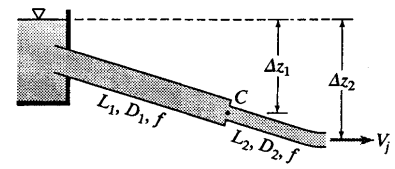

In [112]:
img = Image.open(r"figures/123.png")
img

**Given:**

In [121]:
%%render param
L_E=300 #m
z_2=50 #m
L_1= 200 #m
D_1= 350/1000 #m
L_2= 100 #m
D_2= 250/1000 #m
z_1=40 #m
f=0.06

<IPython.core.display.Latex object>

a) 


**Hint**

```{toggle}
For pipes in series the conservation equations of mass and energy are:

Conservation of Mass $Q_E= Q_1=Q_2$

Conservation of Energy $h_{fE}= h_f1+h_f2$

Considering the equation of $h_f$ is:

$$
h_f= \frac {fLV^2}{2gD}\\
h_f= \frac {8fLQ^2}{\pi ^2gD^5}
$$

Using the energy losses equation and the conservation of energy we have the following:

$$
\frac{8f_EL_EQ^2}{\pi^2 gD_E^5}=\frac{8f_1L_1Q^2}{\pi^2 gD_1^5}+\frac{8f_2L_2Q^2}{\pi^2 gD_2^5}\\
$$

$$
\frac{f_EL_E}{D_E^5}=\frac{f_1L_1}{D_1^5}+\frac{f_2L_2}{D_2^5}\\
$$

$$
D_E=(\frac{f_EL_E}{\frac{f_1L_1}{D_1^5}+\frac{f_2L_2}{D_2^5}})^{1/5}
$$

Assume:
$D_E=0.25$(m)
$f_E= 0.06$ 
```

**Solution**

In [122]:
%%render long
D_E=0.25 #m
L_E= (((f*L_1)/D_1**5+(f*L_2)/D_2**5)*D_E**5)/f #m

<IPython.core.display.Latex object>

**Hint**

Considering the following points 1 and 2:

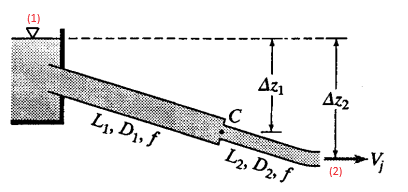

In [723]:
img = Image.open(r"figures/123Sa.png")
img

```{toggle}
The Bernoulli equation between point 1 and 2 is:

$$
z_1+\frac{p_1}{\rho g}+\frac{V_1^2}{2 g}=z_2+\frac{p_2}{\rho g}+\frac{V_2^2}{2 g}+h_{fE}\\
$$

With the following information

$$
z_1=50,\hspace{0.5cm}p_1=0,\hspace{0.5cm} V_1=0,\hspace{0.5cm} z_2=0,\hspace{0.5cm} p_2=0\\
$$

We have 

$$
z_1=\frac{V_2^2}{2 g}+h_{fE}\\
h_{fE}=z_1-\frac{V_2^2}{2 g}\\
$$

Considering the equation of $h_f$ is:

$$
h_f= \frac {fLV^2}{2gD}\\
h_f= \frac {8fLQ^2}{\pi ^2gD^5}
$$

We can use the following equation:

$$
\frac{8f_EL_EQ^2}{\pi^2gD_E^5}=z_1-\frac{8Q^2}{\pi^2gD_2^4}\\
$$

$$
Q^2(\frac{8f_EL_E}{\pi^2gD_E^5}+\frac{8}{\pi^2gD_2^4})=z_1\\
$$

$$
Q=\sqrt{\frac{z_1}{\frac{8f_EL_E}{\pi^2gD_E^5}+\frac{8}{\pi^2gD_2^4}}}
$$
```

**Solution**

In [123]:
%%render long
Z_1=50 #m
Q= sqrt(Z_1/((8*f*L_E)/(pi**2*g*D_E**5)+(8)/(pi**2*g*D_2**4))) #m3/s
Q_= Q*1000 #L/s

<IPython.core.display.Latex object>

b)

Considering the following points 1 an 2:

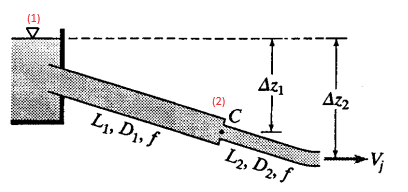

In [725]:
img = Image.open(r"figures/123Sb.png")
img

**Hint**

```{toggle}
The Bernoulli equation between point 1 and 2 is:

$$
z_1+\frac{p_1}{\rho g}+\frac{V_1^2}{2 g}=z_2+\frac{p_2}{\rho g}+\frac{V_2^2}{2 g}+h_{f}\\
$$

With the following information

$$
z_1=40,\hspace{0.5cm} P_1=0,\hspace{0.5cm} V_1=0,\hspace{0.5cm} z_2=0,\hspace{0.5cm}\\
$$

$$
\frac{P_2}{\rho g}=z_1-\frac{V_2^2}{2 g}-h_{f}
$$
```

**Solution**

In [127]:
%%render long 2
Z_1=40 #m
D=350/1000 #m
L=200 #m
V_2= Q/(pi*D**2/4) #m/s
h_f= (8*f*L*Q**2)/(pi**2*g*D**5)
Pressure_head= Z_1-V_2**2/(2*g)-h_f #m

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The Bernoulli equation between downstream C and the end of the pipe:

$$
z_C+\frac{p_C}{\rho g}+\frac{V_C^2}{2 g}=z_2+\frac{p_{out}}{\rho g}+\frac{V_{out}^2}{2 g}+h_{f}\\
$$

With the following information

$$
z_C=40,\hspace{0.5cm} P_{out}=0,\hspace{0.5cm} V_{out}=0,\hspace{0.5cm} z_{out}=0,\hspace{0.5cm}\\
$$

$$
\frac{p_C}{\rho g}=Z_C-\frac{V_C^2}{2 g}-h_{f}
$$
```

**Solution**

In [128]:
%%render long 2
Z_C=40 #m
D=250/1000 #m
V_C= Q/(pi*D**2/4) #m/s
#h_f= (8*f*L*Q**2)/(pi**2*g*D_2**5)
Pressure_head= Z_C-V_C**2/(2*g)-h_f #m

<IPython.core.display.Latex object>

### Pipes in parallel

---
#### Question 4 (*)

Two reservoirs are connected by two parallel pipes with diameters of 100 mm and 200 mm respectively. Both pipes have lengths of 1000 m and friction coefficients f = 0.035. Work from basic principles to estimate the equivalent diameter of the two pipes. Assume that the equivalent pipe has a length of 1000 m and an f of 0.035. {213 mm}

**Given:**

In [130]:
%%render param 
D_1=100/1000 #m
D_2=200/1000 #m
L=1000 #m
f=0.035

<IPython.core.display.Latex object>

**Hint**

```{toggle}
For pipes in parallel, the conservation of mass is:  

$$
Q_E=Q_1+Q_2
$$  

Calculating Q with Darcy-Weisbach equation:  

$$
h_f=\frac{fLV^2}{2gD}\\
h_f=\frac{8fLQ^2}{\pi^2gD^5}\\
Q=\sqrt{\frac{\pi^2gD^5h_f}{8fL}}\\
Q_E=\sqrt{\frac{\pi^2gD_E^5h_f}{8f_EL_E}}\\
Q_E=Q_1+Q_2\\
\sqrt{\frac{\pi^2gD_E^5h_{fE}}{8f_EL_E}}=\sqrt{\frac{\pi^2gD_1^5h_{f1}}{8f_1L_1}}+\sqrt{\frac{\pi^2gD_2^5h_{f2}}{8f_2L_2}}
$$

As in parallel pipes:  

$$
h_{fE}=h_{f1}=h_{f2}\\\\
\sqrt{\frac{D_E^5}{f_EL_E}}=\sqrt{\frac{D_1^5}{f_1L_1}}+\sqrt{\frac{D_2^5}{f_2L_2}}\\
D_E=((\sqrt{\frac{D_1^5}{f_1L_1}}+\sqrt{\frac{D_2^5}{f_2L_2}})^2(f_EL_E))^{1/5}
$$  

```

**Solution**

In [131]:
%%render long
D_E= ((sqrt(D_1**5/(f*L))+sqrt(D_2**5/(f*L)))**2*(f*L))**(1/5) #m
D_E_= D_E*1000 #mm

<IPython.core.display.Latex object>

---
#### Question 5 (**)[R]

A 200 mm diameter pipe with length of 500 m and roughness coefficient f = 0.025 is placed in parallel with a 500 mm diameter pipe with length 500 m and f = 0.030. The total flowrate in the system is 600 l/s. Ignore minor losses.

a. Calculate the diameter of an equivalent pipe with length 500 m and f = 0.030. Work from basic principles. {0.521 m}

b. Use the equivalent pipe to calculate the headloss in the system. {11.57 m}

c. Calculate the flow rate in each of the two parallel pipes. {59.8 L/s; 540 L/s}

d. Check that the sum of the flows in the two pipes equals the known system flow (or is close to it).

**Given:**

In [136]:
%%render param 
D= 200/1000 #m 
L= 500 #m
f= 0.025 
D_p= 500/1000 #m 
L_p= 500 #m 
f_p=0.03
Q= 600/1000 #m3/s

<IPython.core.display.Latex object>

a)

In [137]:
%%render param 
L_E= 500 #m 
f_E= 0.03

<IPython.core.display.Latex object>

**Hint**

```{toggle}
For pipes in parallel the conservation equations of mass and energy are:

Conservation of Mass $Q_E= Q_1+Q_2$

Conservation of Energy $h_E= hf_1=hf_2$

The equation for $h_f$ is:

$$
h_f= \frac{8fLQ^2}{\pi^2 gD^5}\\
$$

Using the equation of $h_f$ to calculate Q:

$$
Q= \sqrt {\frac{\pi^2 h_fgD^5}{8fL}}\\
$$

Replacing that equation in the conservation of mass

$$
(\sqrt {\frac{\pi^2 h_fgD^5}{8fL}})_E=(\sqrt {\frac{\pi^2 h_fgD^5}{8fL}})_1 +(\sqrt {\frac{\pi^2 h_fgD^5}{8fL}})_2\\
(\sqrt {\frac{D^5}{fL}})_E=(\sqrt {\frac{D^5}{fL}})_1 +(\sqrt {\frac{D^5}{fL}})_2\\
$$
```

**Solution**

In [138]:
%%render long 
D_E= (((D**5/(f*L))**0.5+(D_p**5/(f_p*L_p))**0.5)**2*f_E*L_E)**(1/5) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The equation for $h_f$ is:

$$
h_f= \frac{8fLQ^2}{\pi^2 gD^5}\\
$$
```

**Solution**

In [139]:
%%render long 2
h_f= (8*f_E*L_E*Q**2)/(pi**2*g*D_E**5) #m

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
Using the equation of $h_f$ to calculate Q:

$$
Q= \sqrt {\frac{\pi^2 h_fgD^5}{8fL}}\\
$$
```

**Solution**

Pipe 1

In [142]:
%%render long 
Q_1= ((h_f*pi**2*g*D**5)/(8*f*L))**0.5 #m3/s
Q_1_= Q_1*1000 #L/s

<IPython.core.display.Latex object>

Pipe 2

In [143]:
%%render long 
Q_2= ((h_f*pi**2*g*D_p**5)/(8*f_p*L_p))**0.5 #m3/s
Q_2_= Q_2*1000 #L/s

<IPython.core.display.Latex object>

d)

**Solution**

In [145]:
%%render long 0
Q_T= Q_1_+Q_2_ #L/s

<IPython.core.display.Latex object>

## Problems	for	Lecture	23: System	curve	and	pump	operating	point

---
#### Question 1 (**)[R]

A 200 mm pipe with length 3 000 m and f = 0.122 is used in the system below. The end of the pipe is 20 m above the water level. Calculate the energy head that the pump must add to the system to deliver a velocity of 2 m/s? Ignore local losses and losses in the suction pipe. Solve the problem from basic principles. {393.3 m}

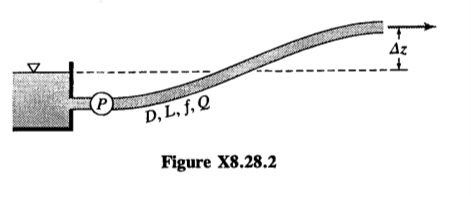

In [34]:
img = Image.open(r"figures/126.png")
img

**Given:**

In [33]:
%%render param 
L= 3000 #m
D= 200/1000 #m
f= 0.122 
z_2= 20 #m 
V= 2 #m/s

<IPython.core.display.Latex object>

**Hint**


```{toggle}

The energy head that the pump must add to the system can be calculated from the conservation of energy between the tank and the end of the pipe:

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}+h_f-h_p\\
$$

In the tank $z_1 =0, P_1=0, V_1=0$ in the end of the pipe $P_2=0$ for atmospheric pressure because the jet is outside the pipe

Additionally, consider the following equation to calculate $h_f$:  

$$
h_f= \frac {fLV^2}{2gD}
$$

```

**Solution**

In [36]:
%%render long 1
h_f= f*L*V**2/(2*g*D) #m
h_p= z_2+V**2/(2*g)+h_f #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)[R]

A pumped supply system will be used to transport water at 15 °C between two reservoirs with a total head difference of 50 m. The pipes of the system consist of a 600 m long pipe on the suction side of the pump with diameter 200 mm and absolute roughness 0.2 mm; and a 2 km long pipe on the delivery side of the pump with diameter 150 mm and absolute roughness of 0.2 mm. The suction and delivery pipes have total local loss coefficients of 80 and 200 respectively. The pump impeller eye is located 4 m below the
water level in the suction reservoir. The required flowrate in the system is 40 L/s. Determine the following:  

a) The working point of the pump to deliver the required flowrate. {191 m, 40 L/s}  

b) The classification of the flow in the suction and delivery pipes based the zones defined on the Moody diagram. {both transitional turbulent}  

c) The minimum input power required by the pump if the pump efficiency is assumed to be 75%. {99.8 kW}

**Given:**

In [146]:
%%render param 4
T=15 #°C
h_h=50 #m
L_s=600 #m
D_s=200/1000 #m
e_s=0.2/1000 #m
L_d=2000 #m
D_d=150/1000 #m
e_d=0.2/1000 #m
k_s=80
k_d=200
Q=40/1000 #m3/s
nu=1.14*10**-6 #m2/s

<IPython.core.display.Latex object>

a)


**Hint**


```{toggle}
The working point of the pump is the total head that the pump must supply to achieve the required flow rate of 40 L/s. For this, it is required to calculate the energy losses in the suction and delivery pipes, including the friction, local losses, and the total head difference. 

$$
h_p=h_{h}+h_{fs}+h_{ss}+h_{fd}+h_{sd}+ h_{wl}
$$

Where:

$h_p$ = is the total head of the pump 

$h_{h}$ i th total head difference between the two reservoirs

$h_{fs}$= is the friction loss of the suction pipes 

$h_{fd}$= is the friction loss of the delivery pipes 

$h_{fs}$= is the locas losses of the suction pipes 

$h_{fd}$= is the local losses of the delivery pipes 




The first step is calculate the flow velocity for each pipe, using the following equation:

$$
V= \frac{4Q}{\pi D^2}
$$

Once the velocity is calculated, the next step is calculate the Reynolds number

$$
Re= \frac {V*D}{\nu}
$$

If the flow is turbulent, the Colebrook White equation can be used to calculate the friction factor

$$
\frac{1}{\sqrt {f}}= -2 log (\frac{5.74}{Re^{0.9}} + \frac {e}{3.7D})
$$

If the flow is laminar, the following equation can be used:

$$
f= \frac {64}{Re}
$$

The next step is calculate the head losses for the suction and delivery pipe with the following equation:

$$
h_f= \frac {fLV^2}{2gD}
$$

Then, the local head losses can be calculated with:

$$
h_s= k*\frac {V^2}{2g}
$$

Finally, the total head required by the pump can be calculated.
```

**Solution**

In [147]:
%%render long
V_s= Q/(pi*D_s**2/4) #m/s

Re_s= V_s*D_s/nu
f_s= (1/(-2*log10(5.74/(Re_s**0.9)+(e_s/(3.7*D_s)))))**2
h_fs= (f_s*L_s*V_s**2)/(2*g*D_s) #m
h_ss= k_s*(V_s**2/(2*g)) #m

V_d= Q/(pi*D_d**2/4) #m/s
Re_d= V_d*D_d/nu
f_d= (1/(-2*log10(5.74/(Re_d**0.9)+(e_d/(3.7*D_d)))))**2
h_fd= (f_d*L_d*V_d**2)/(2*g*D_d) #m
h_sd= k_d*(V_d**2/(2*g)) #m

h_p= h_h+h_fs+h_ss+h_fd+h_sd #m

<IPython.core.display.Latex object>


```{toggle}
The working point of the pump is:  

$$
Q=40 L/s\\
h_p=191 m
$$
```

b)

**Hint**

```{toggle}

The flow is turbulent when the Reynolds number is above 4000. 

```

**Solution**

```{toggle}

Considerin the values for the Reynolds number in the suction and delivery pipe are:

$$
Re_s=223375.359\\
Re_d=297833.812
$$

Both are turbulen flow.

```

c)

**Hint**

```{toggle}
The power of the pump can be calculated as:

$$
P= \frac{ \rho_{water} g h_p Q}{\eta}
$$

```

**Solution**

In [149]:
%%render long 2
eta=0.75
P= ((rho_water*g*h_p*Q)/eta)/1000 #kW

<IPython.core.display.Latex object>

---
#### Question 3 (**)

A pumped supply system will be used to transport water at 15 °C between two reservoirs with a total head difference of 50 m. The system consists of a 2 km long pipe with diameter 150 mm and absolute roughness 0.2 mm. The pipe has a total secondary loss coefficient of 200. The required flow rate in the system is 50 L/s. Determine the following for the system (work from basic principles):

a)**The working point of the pump to deliver the required flow rate. {250.59 m}

b)**The minimum input power required by the pump if the pump efficiency is assumed to be 75%. {163.89 kW}

**Given:**

In [39]:
%%render param 4
z= 50#m 
L= 2000 #m
D= 150/1000 #mm 
e= 0.2/1000 #m 
k= 200 
Q= 50#L/s
Q_m =Q/1000 #m3/s
eta= 0.75 

<IPython.core.display.Latex object>

a)


**Hint**

```{toggle}

For this example the conservation of energy will be:   

$$
H_1=H_2+h_f+h_m-h_p
$$  

From this equation $h_p$ can be solved.

Note: the viscosity of water at 15°C is $\nu=1.139x10^{-6} m^2/s $

```

**Solution**

In [40]:
%%render long 2
V= Q_m*4/(pi*D**2)#m/s
Re= V*D/nu
f= (1/(-2*log10(5.74/(Re**0.9)+(e/(3.7*D)))))**2
h_p= z+f*L*V**2/(2*g*D)+k*V**2/(2*g) #m

<IPython.core.display.Latex object>

b)


**Hint**

```{toggle}

To calculate the minimum input power required by the pump consider the following equation:  

$$
P = \rho_{\text{water}} \, g \, h_p \, \frac{Q_m}{\eta}
$$

```

**Solution**

In [41]:
%%render long 2
P= rho_water*g*h_p*Q_m/eta #W
P_= P/1000 #kW

<IPython.core.display.Latex object>

---
#### Question 4 (**)

The tanks, pump and pipelines of the system below have properties as shown. The suction line entrance from the pressure tank is flush and the discharge into the open tank is submerged  If the pump P adds 1.5 kW to the system: 

a) Determine the flow rate {103 L/s}

b) Find the pressure in the pipe on the suction side of the pump. Ignore local losses. {-49.48 kPa}

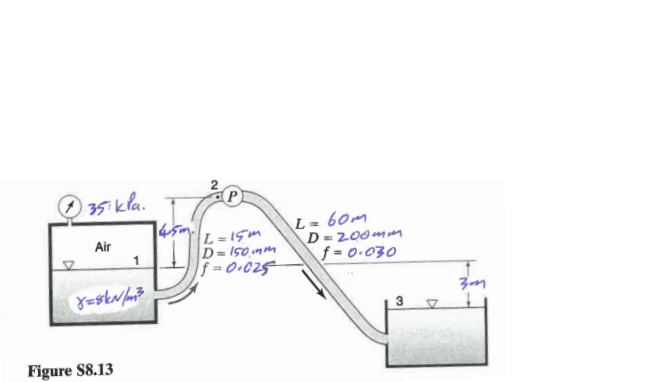

In [37]:
img = Image.open(r"figures/129.png")
img

**Given:**

In [150]:
%%render param
P=1.5*1000 #W
p_1=35000 #Pa
gamma=8000 #N/m3
z_2=4.5 #m
L_s=15 #m
D_s=150/1000 #m
f_s=0.025
L_d=60 #m
D_d=200/1000 #m
f_d=0.03
z_3=-3 #m

<IPython.core.display.Latex object>

a)


**Hint**

```{toggle}

To determine the flow rate, the equation for the conservation of energy can be used:

$$
z_1+\frac{p_1}{\gamma}+\frac{V_1^2}{2 g}+h_p=z_3+\frac{p_3}{\gamma}+\frac{V_3^2}{2 g}+h_{fs}+h_{fd}\\
$$

The following assumptions can be made:

$$
z_1=0,\hspace{0.5cm} V_1=0,\hspace{0.5cm} p_3=0,\hspace{0.5cm} V_3=0,\hspace{0.5cm}\\
$$

Considering the assumptions, the Bernoulli equation is:

$$
\frac{p_1}{\gamma}+h_p=z_3+h_{fs}+h_{fd}\\
$$

The friction losses of the pipes can be replaced with the following equation in terms of Q:

$$
h_f= \frac{8 fL Q^2}{\pi^2 g D^5}
$$

We have the following equation:

$$
\frac{p_1}{\gamma}+\frac{P}{\gamma Q}=z_3+\frac{8f_sL_sQ^2}{\pi^2 gD_s^5}+\frac{8f_dL_dQ^2}{\pi^2 gD_d^5}\\
$$

This equation can be rearranged to calculate the flow rate, resulting in three solutions: two negative and one positive. Since flow rate cannot be negative, the valid solution is the positive value derived from the cubic equation. 
```

**Solution**

In [151]:
%%render long
Q=symbols('Q')
expr = (p_1/gamma)+(P/(gamma*Q))-z_3-((8*f_s*L_s*Q**2)/(pi**2*g*D_s**5))-((8*f_d*L_d*Q**2)/(pi**2*g*D_d**5))


Q = solve(expr)


Q #m3/s

<IPython.core.display.Latex object>

In [164]:
%%render long
Q= 0.103 #m3/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The pressure in suction pipe can be calculated using the Bernoulli equation between point 1 and point 2 

$$
z_1+\frac{p_1}{\gamma}+\frac{V_1^2}{2 g}=z_2+\frac{p_2}{\gamma}+\frac{V_2^2}{2 g}+h_{fs}\\
$$

The assumptions for the Bernoulli equation are:

$$
z_1=0,\hspace{0.5cm} V_1=0\hspace{0.5cm}\\
$$

The conservation of Energy for this exercise is:

$$
\frac{p_1}{\gamma}=z_2+\frac{p_2}{\gamma}+\frac{V_2^2}{2 g}+h_{fs}\\
$$

The friction losses of the pipes can be replaced with the following equation in terms of Q:

$$
h_f= \frac{8 fL Q^2}{\pi^2 g D^5}
$$

Replacing the friction losses in the Bernoulli equation, we have:  

$$
p_2=(\frac{p_1}{\gamma}-z_2-\frac{V_2^2}{2 g}-\frac{8f_sL_sQ^2}{\pi^2 gD_s^5})\gamma
$$
```

**Solution**

In [167]:
%%render long 2
V_2= Q/(pi*D_s**2/4) #m/s
p_2= (p_1/gamma-z_2-V_2**2/(2*g)-((8*f_s*L_s*Q**2)/(pi**2*g*D_s**5)))*gamma #Pa
p_2_= p_2/1000 #kPa

<IPython.core.display.Latex object>

## Problems for Lecture 24: Cavitation in Pumps

---
#### Question 1 (***)[R]

A pump is installed at 1000 m (patm = 90 kPa) above sea level where the maximum water temperature is estimated to be 20°C (p<sub>vap</sub> = 2.3 kPA). The pump eye is 2 m above the suction water level. The suction pipe has a velocity of 2 m/s, a friction headloss of 1.2 m and a minor loss of 0.5 m. Calculate the NPSH available for the pump. {5.24 m}

**Given:**

In [45]:
%%render param 1
p_vap = 2.3*1000 #Pa
V_s= 2 #m/s
h_f= 1.2 #m 
h_m= 0.5 #m 
z_2= 2#m
p_atm = 90*1000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}

For this exercise, the conservation of energy can be described as:

$$
z_1+\frac {p_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {p_2}{\rho g}+\frac{V_2^2}{2g}+h_{fs}+h_{ss}\\
$$


where $z_1 = 0, V_1= 0$

To calculate the NPSH we have:

$$
NPSH= \frac {p_{abs}-P{vap}}{\rho g} + \frac {V_s^2}{2g}
$$

```

**Solution**

In [47]:
%%render long 2
p_2= (p_atm/(rho_water*g)-V_s**2/(2*g)-h_f-h_m-z_2)*rho_water*g #Pa
NPSH= (p_2-p_vap)/(rho_water*g)+V_s**2/(2*g) #m

<IPython.core.display.Latex object>

---
#### Question 2 (***)[R]

Consider the figure below. Assume a pipe diameter or 350 mm, f = 0.016 and the lengths of BC = 12 m, DE = 920 m and $\Delta z$ = 48 m. Water at 15°C is pumped from the lower to the upper reservoir. The system is located at altitude of 1000 m above sea level. Point C is 6.0 m above the surface of the lower reservoir. The pump has an NPSHrequired = 2 m. Ignore minor losses and calculate the maximum flow rate that the system will be able to provide without experiencing cavitation. {0.575 $m^3/s$}

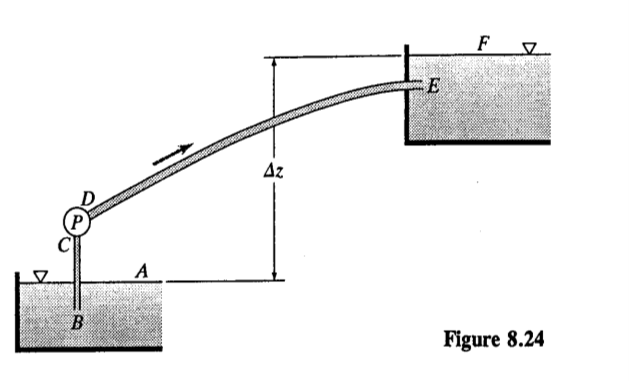

In [41]:
img = Image.open(r"figures/131.png")
img

**Given:**

In [42]:
%%render param
D=350/1000 #m
f=0.016
L_BC=12 #m
L_DE=920 #m
dz=48 #m
T=15 #°C
z_C=6 #m
NPSH_required=2 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the maximum flow rate, both the total head equation of the system and the NPSH equation for cavitation must be considered.

The height at point F is equal to the height of point A plus the height provided by the pump, minus the head loss due to friction in the suction and delivery pipes. 

$$
H_A-h_s+h_p-hd=H_F\\
NPSH_{required}=\frac{p_C}{\rho g}+\frac{V_C^2}{2 g}-\frac{p_v}{\rho g}=2 \hspace{0.2cm} (1)
$$

From Table A.1, at T=15°C:

$$
\frac{p_v}{\rho g}=0.17 \hspace{0.2cm}m\hspace{0.2cm} abs\\
\frac{p_C}{\rho g}+\frac{V_C^2}{2 g}=2.17 \hspace{0.2cm}m\\
$$

From Table A.3, at 1000 m above sea level:

$$
p_A=89876 \hspace{0.2cm}Pa\\
\frac{p_A}{\rho g}=\frac{89876}{1000*9.81}=9.16\hspace{0.2cm} m
$$

The pressure and velocity at point C can be determined using the Bernoulli equation between points A and C. The following terms are derived from the conservation of energy equation 

$$
\frac {p_C}{\rho_{water}g}+ \frac {V_c^2}{2g}
$$

The conservation of energy equation between points A and C is given by

$$
\frac{p_A}{\rho g}+z_A+\frac{V_A^2}{2 g}-h_f=\frac{p_C}{\rho g}+z_C+\frac{V_C^2}{2 g}\\
$$

The assumptions for applying the conservation of energy are that $z_A$= 0 m  and $V_A$ is approximately zero, since the tank is very large. With these assumptions, the Bernoulli equation simplifies to

$$
\frac{p_A}{\rho g}-\frac {fLV_C^2}{2gD}=\frac{p_C}{\rho g}+z_C+\frac{V_C^2}{2 g}\\
$$

We can substitute the values provided in the problem statement and in the tables:

$$
\frac{p_A}{\rho g}= 9.16 m \\
z_C= 6 m\\
h_{fAC}= \frac {fLV_C^2}{2gD} = \frac {0.016*12*V_C^2}{2g*0.35}
$$

Replacing this values we have:

$$
9.16-\frac {0.016*12*V_C^2}{2g*0.35}=\frac{p_C}{\rho g}+6+\frac{V_C^2}{2 g}\\
\frac{p_C}{\rho g}+\frac{V_C^2}{2 g}= 3.16- 0.549* \frac{V_C^2}{2 g} \hspace{0.2cm} (2)\\
$$

By using equation (2) and substituting it into equation (1), we obtain a system of two equations with two unknowns 

$$
3.16- 0.549* \frac{V_C^2}{2 g}-0.17=2
$$

Once the velocity is calculated, the flow rate can be determined with the following equation:

$$
Q= V_C* A_C
$$

```

**Solution**

In [756]:
%%render long
V_C= sqrt((2*g*D)/(f*L_BC)*(9.16-2.16-z_C)) #m/s
A= pi*D**2/4 #m2
Q= A*V_C #m3/s

<IPython.core.display.Latex object>